In [1]:
# ! pip install xlrd
# ! pip install seaborn
# ! pip install imblearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler



import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel('datasets/default_of_credit_card_clients.xls',header=1,index_col='ID')

In [3]:
# Display the first few rows of the dataframe
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# read and creation of dataframe
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns=lambda x: x.upper(), inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   30000 

In [6]:
df.shape

(30000, 24)

In [7]:
# Check for missing values
print(df.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [8]:
# Check for data types
print(df.dtypes)

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object


In [9]:
# Get descriptive statistics
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df['EDUCATION'].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [11]:
df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [12]:
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(f"Dataset size after:\t{df.shape[0]}")



Dataset size before:	30000
Dataset size after:	29601


In [13]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [14]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_features:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

In [15]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

# <0 has been changed to -1 and >=0 has been incremented by 1 so that the value ranges from (1,9)

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.794770,0.666329,0.638492,0.591939,0.550894,0.520759
std,1.339224,1.397190,1.389153,1.350751,1.309342,1.325013
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [16]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [17]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [18]:
df['DEFAULT'].value_counts()

DEFAULT
0    22996
1     6605
Name: count, dtype: int64

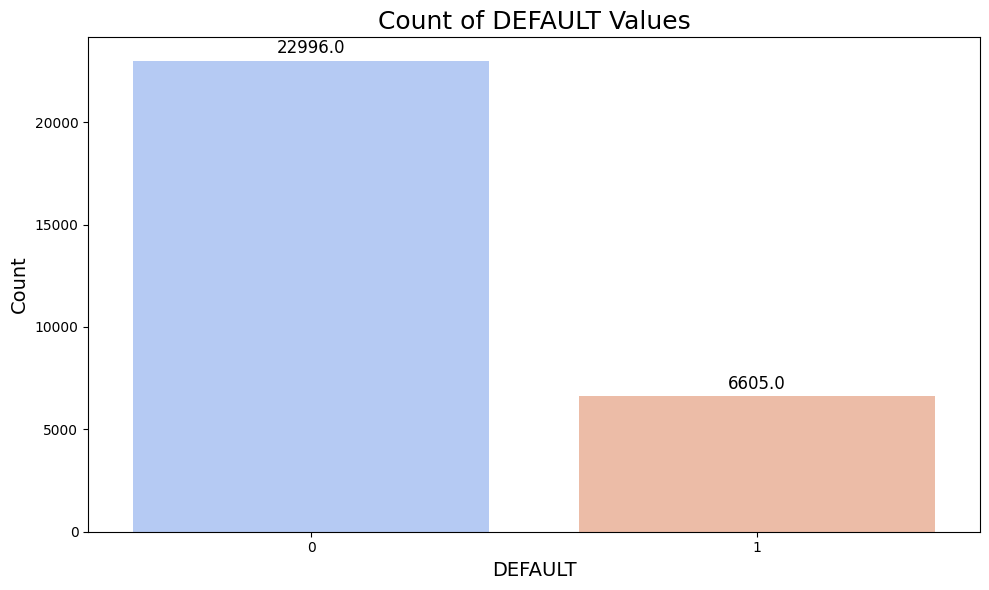

In [19]:
# Assuming 'df' is your dataframe and 'DEFAULT' is the column you're examining:
value_counts = df['DEFAULT'].value_counts()

# Convert the value counts to a DataFrame:
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['DEFAULT', 'Count']  # Renaming the columns for clarity

# Start the plot with a larger figure size for better readability
plt.figure(figsize=(10, 6))

# Create the bar plot with additional aesthetics
barplot = sns.barplot(
    x='DEFAULT', 
    y='Count', 
    data=value_counts_df,
    palette='coolwarm'  # Color palette for visual appeal
)

# Set title and labels with a larger font size for clarity
plt.title('Count of DEFAULT Values', fontsize=18)
plt.xlabel('DEFAULT', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotate the bars with the exact count values
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.1f'),  # Format the count to one decimal point
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
        ha = 'center',  # Center the text horizontally
        va = 'center',  # Center the text vertically
        xytext = (0, 9),  # Position text slightly above the bar
        textcoords = 'offset points',
        fontsize=12
    )

# Improve the layout and display the plot
plt.tight_layout()
plt.show()

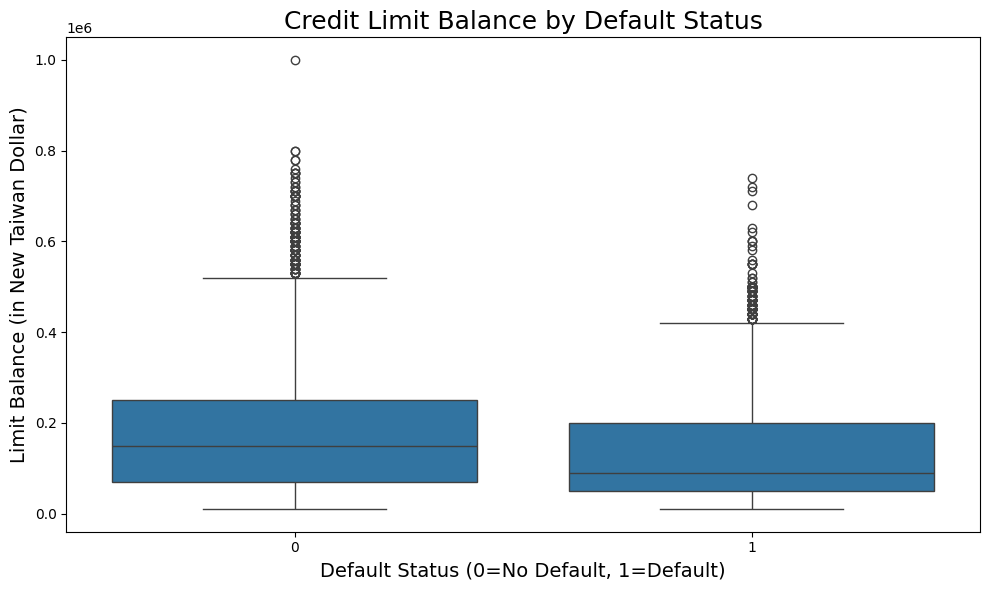

In [20]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the distribution of LIMIT_BAL for each DEFAULT category
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=df)

# Set the title and labels of the plot
plt.title('Credit Limit Balance by Default Status', fontsize=18)
plt.xlabel('Default Status (0=No Default, 1=Default)', fontsize=14)
plt.ylabel('Limit Balance (in New Taiwan Dollar)', fontsize=14)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

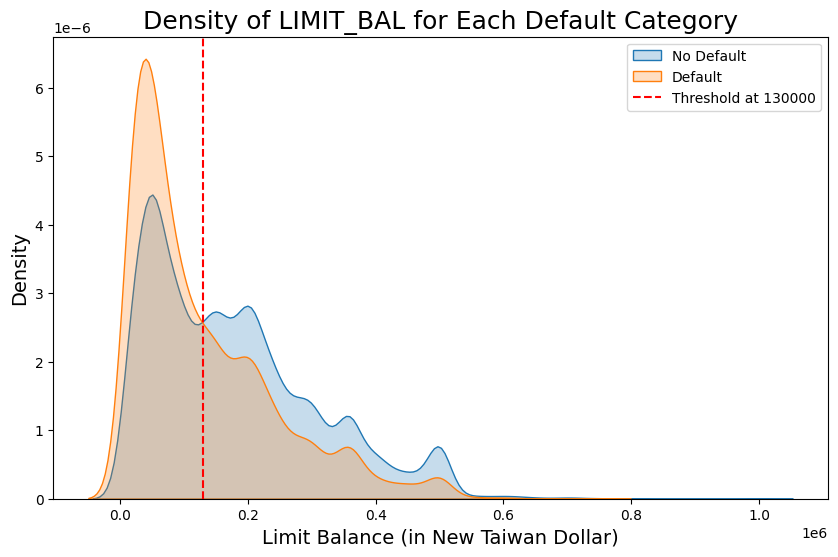

In [21]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the KDE plot for non-defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 0]['LIMIT_BAL'], label = 'No Default', shade=True)

# Draw the KDE plot for defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 1]['LIMIT_BAL'], label = 'Default', shade=True)

# Add a title and labels
plt.title('Density of LIMIT_BAL for Each Default Category', fontsize=18)
plt.xlabel('Limit Balance (in New Taiwan Dollar)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add vertical line to denote a potential threshold (if you have one in mind)
threshold = 130000  # Example threshold
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold at {threshold}')

# Show the legend and plot
plt.legend()
plt.show()

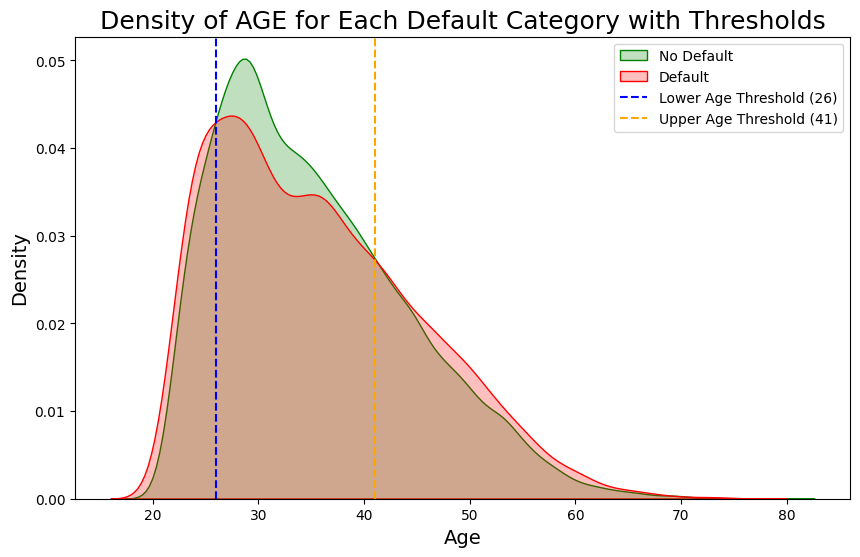

In [22]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the KDE plot for non-defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 0]['AGE'], label='No Default', shade=True, color='g')

# Draw the KDE plot for defaulted individuals
sns.kdeplot(df[df['DEFAULT'] == 1]['AGE'], label='Default', shade=True, color='r')

# Add vertical lines for thresholds
threshold_low = 26
threshold_high = 41
plt.axvline(x=threshold_low, color='blue', linestyle='--', label='Lower Age Threshold (26)')
plt.axvline(x=threshold_high, color='orange', linestyle='--', label='Upper Age Threshold (41)')

# Add a title and labels
plt.title('Density of AGE for Each Default Category with Thresholds', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend
plt.legend()

# Show the plot
plt.show()


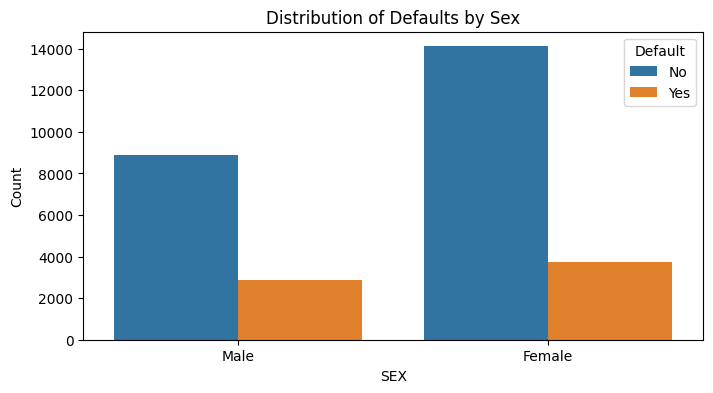

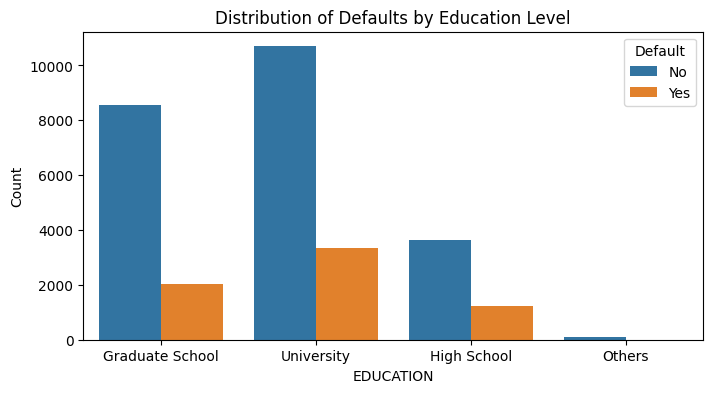

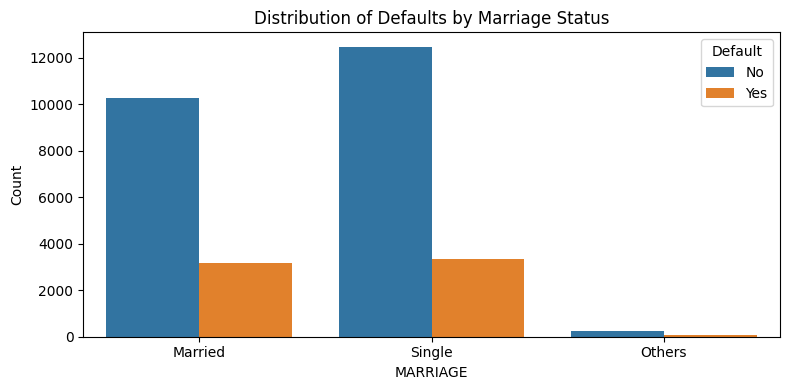

In [23]:
# Define a function to create countplots with renamed labels
def plot_categorical_distribution(dataframe, column_name, title, hue_order, labels_dict):
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=column_name, hue='DEFAULT', data=dataframe, hue_order=hue_order)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    
    # Rename legend labels
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles, ['No', 'Yes'], title='Default')

    # Rename x-axis category labels
    ax.set_xticklabels([labels_dict.get(x.get_text(), x.get_text()) for x in ax.get_xticklabels()])

# Labels dictionaries
sex_labels = {'1': 'Male', '2': 'Female'}
education_labels = {'1': 'Graduate School', '2': 'University', '3': 'High School', '4': 'Others'}
marriage_labels = {'1': 'Married', '2': 'Single', '3': 'Others'}

# Plot for SEX
plot_categorical_distribution(df, 'SEX', 'Distribution of Defaults by Sex', hue_order=[0, 1], labels_dict=sex_labels)

# Plot for EDUCATION
plot_categorical_distribution(df, 'EDUCATION', 'Distribution of Defaults by Education Level', hue_order=[0, 1], labels_dict=education_labels)

# Plot for MARRIAGE
plot_categorical_distribution(df, 'MARRIAGE', 'Distribution of Defaults by Marriage Status', hue_order=[0, 1], labels_dict=marriage_labels)

# Show the plots
plt.tight_layout()
plt.show()

Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.
No. of defaulters have a higher proportion of educated people (graduate school and university)
No. of defaulters have a higher proportion of Singles.

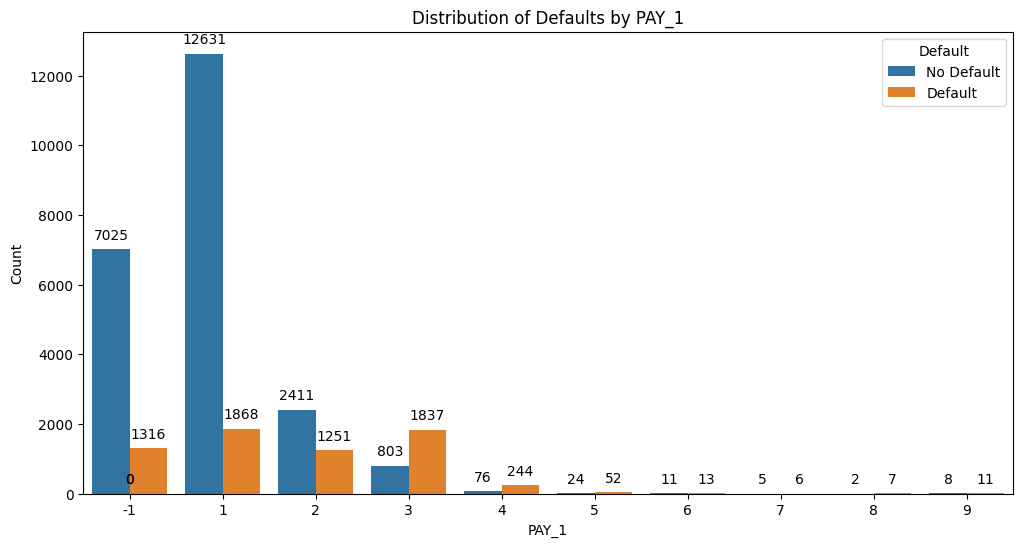

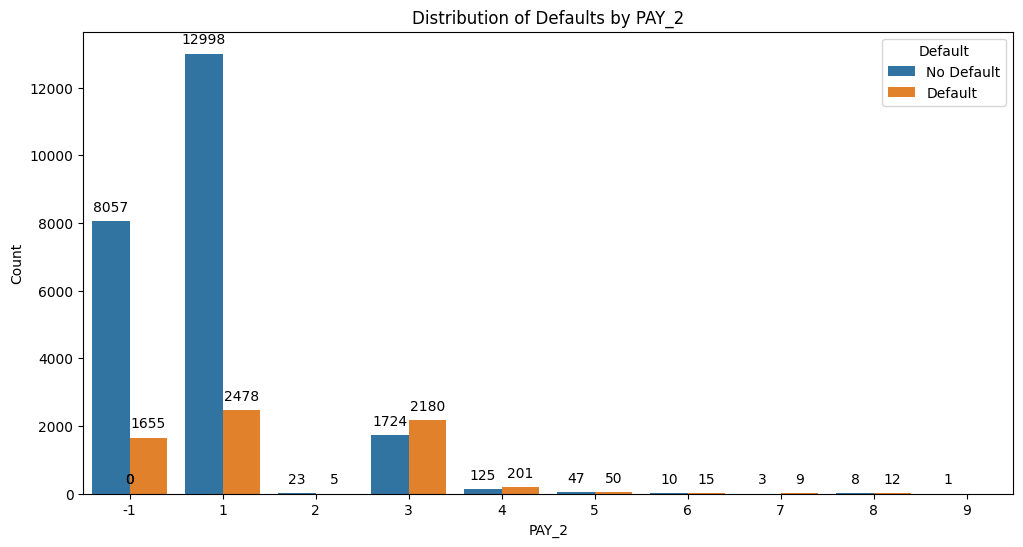

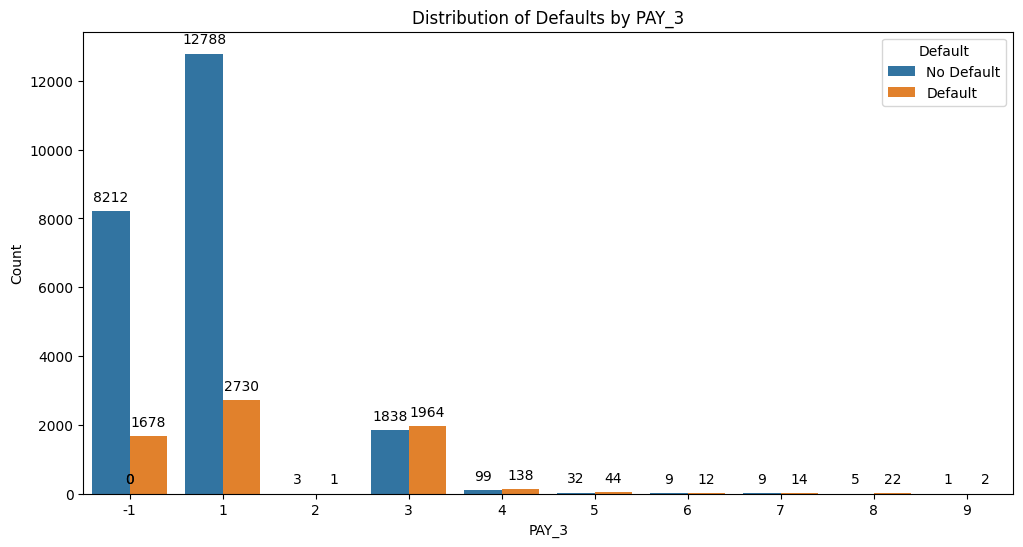

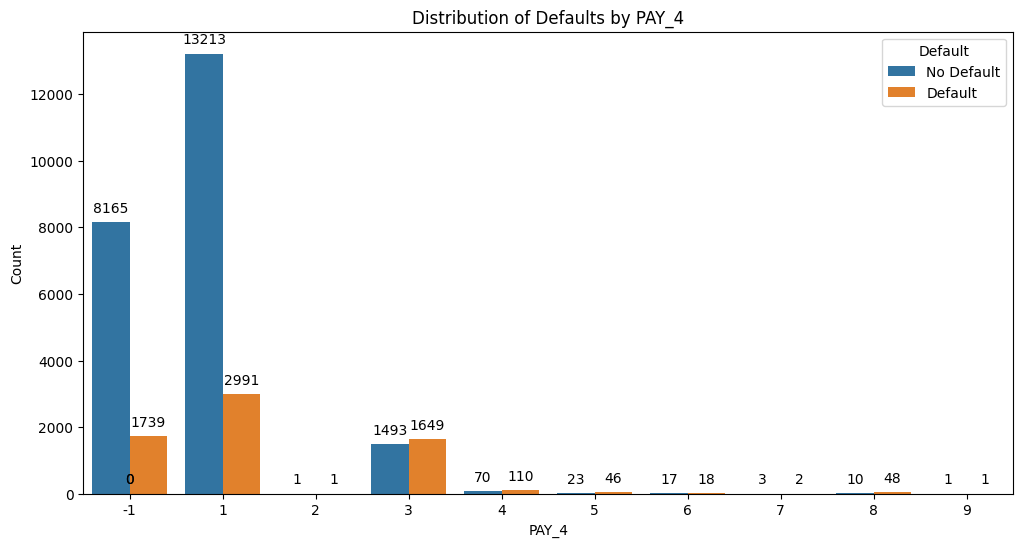

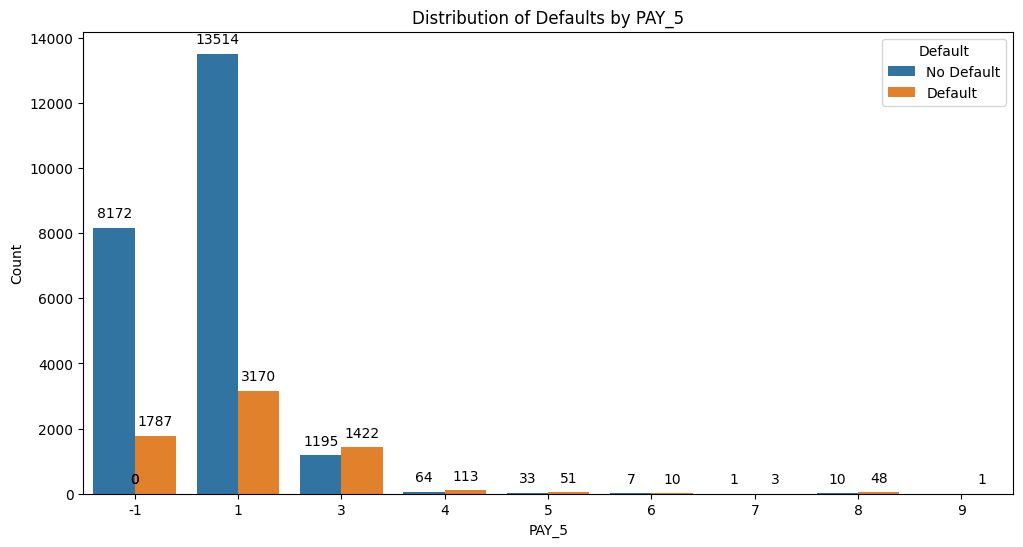

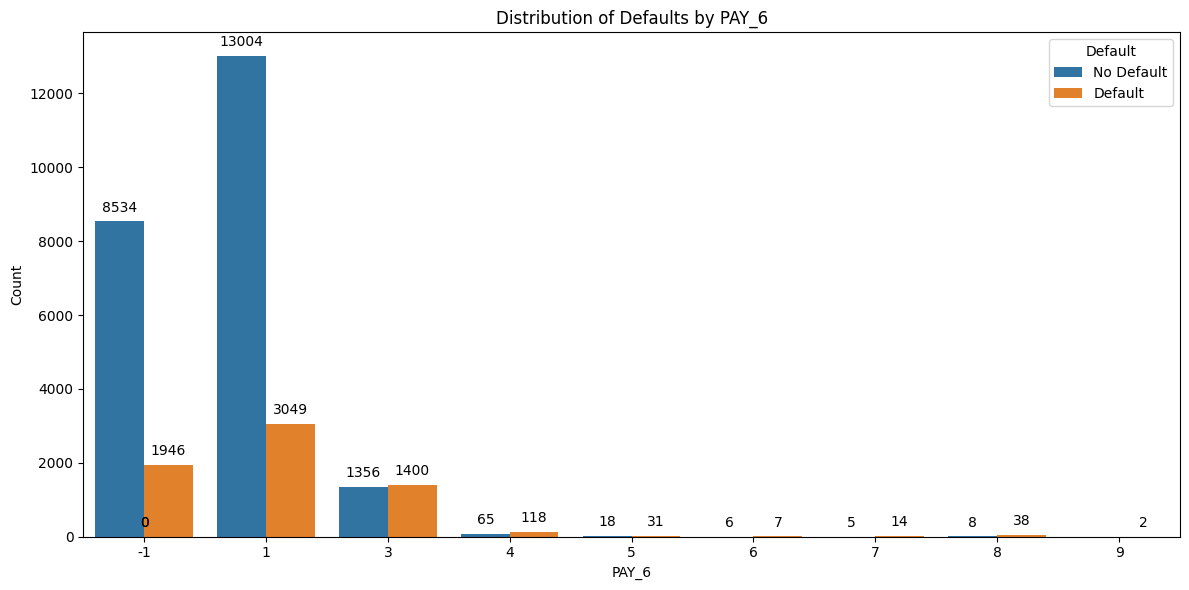

In [24]:
# Define a function to create annotated countplots for payment status
def plot_payment_distribution(dataframe, column_name, title):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=column_name, hue='DEFAULT', data=dataframe)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Count')

    # Rename legend labels
    ax.legend(title='Default', loc='upper right', labels=['No Default', 'Default'])

    # Annotate bars with count information
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Annotate with the height of the bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                    ha='center', va='center',  # Center the text horizontally and vertically
                    xytext=(0, 10),  # Offset text by 10 points vertically
                    textcoords='offset points',  # Interpret xytext as offset in points
                    fontsize=10)

# Plot for each PAY attribute
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for column in pay_columns:
    plot_payment_distribution(df, column, f'Distribution of Defaults by {column}')

# Show the plots
plt.tight_layout()
plt.show()

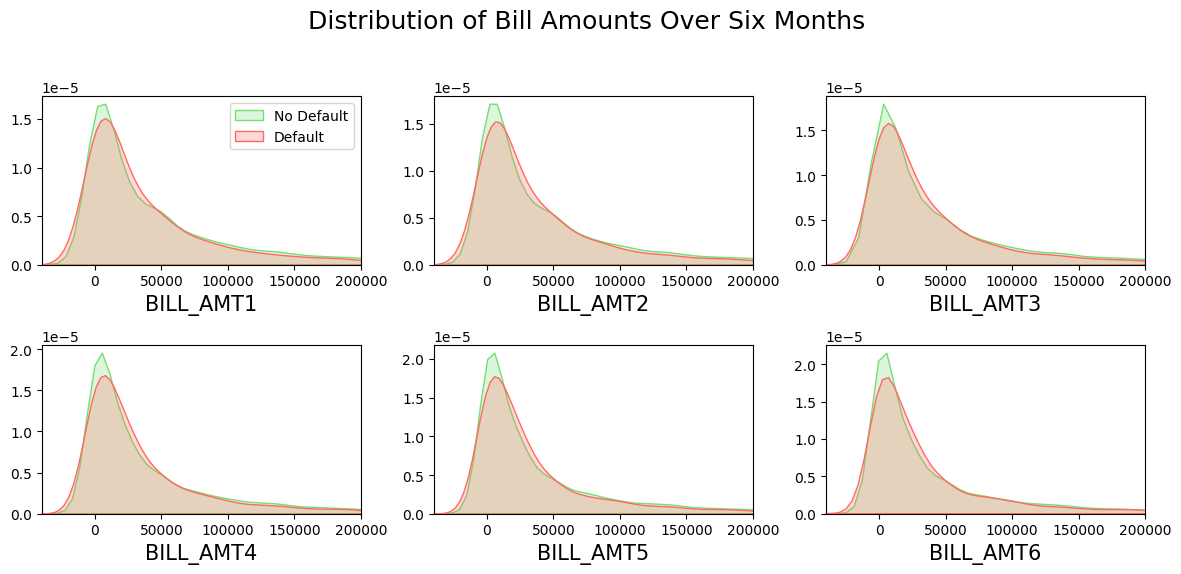

In [25]:
# Define the figure size and setup
plt.figure(figsize=(12, 6))

BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Loop through each BILL_AMT column and create a subplot for each
for i, col in enumerate(BILL_AMT_cols):    
    ax = plt.subplot(2, 3, i + 1)    
    sns.kdeplot(df.loc[df['DEFAULT'] == 0, col], label='No Default', color='#77DD76', shade=True)
    sns.kdeplot(df.loc[df['DEFAULT'] == 1, col], label='Default', color='#FF6962', shade=True)
    plt.xlim(-40000, 200000)
    plt.ylabel('')
    plt.xlabel(col, fontsize=15)

    # Only add the legend to the first plot to avoid redundancy
    if i == 0:
        plt.legend()
    else:
        # Check if the legend exists before trying to remove it
        legend = ax.get_legend()
        if legend:
            legend.remove()

# Add a main title and adjust the layout
plt.suptitle('Distribution of Bill Amounts Over Six Months', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the main title

# Save the figure before showing it
# plt.savefig('images/continuousBILLAMT.svg')
plt.show()

Comparison Between Defaults and Non-Defaults:
Defaulted Customers: For customers who have defaulted (DEFAULT = 1), the KDE plot can reveal common bill amount ranges. A higher density in lower bill amounts could indicate that customers with lower bill amounts are more likely to default, or vice versa.
Non-Defaulted Customers: Similarly, examining the KDE plot for customers who have not defaulted can highlight the typical bill amounts where default is less likely.

The KDE plots displayed here represent the distribution of bill amounts (BILL_AMT1 through BILL_AMT6) across two categories: those who did not default (No Default) and those who did (Default). These are the main observations:

Similarity Across Time: The shapes of the distributions for No Default and Default are similar across the six months. This suggests that the behavior in terms of bill amounts does not dramatically change month to month for both groups.
Skewness: Both distributions in each time period show a right skew, with a tail extending towards higher bill amounts. This is typical for financial data, where a large number of accounts have lower balances, and a smaller number have very high balances.
Default vs. No Default:
Peak and Spread: The peaks of the KDE plots for the No Default group appear to be consistently higher and sharper than for the Default group, suggesting a higher concentration of individuals around the median or mode bill amount. The Default group's distribution is flatter, indicating a broader spread of bill amounts.
Overlap: There's considerable overlap between the distributions, but it's notable that the Default distribution's peak is slightly shifted towards the lower end compared to the No Default. This might indicate that, on average, individuals who default have slightly lower bill amounts, although this difference is subtle and should be investigated further for robust conclusions.
Density Scale: The y-axis indicates density on a scale of 1e-5, which shows the probability per unit on the x-axis. When interpreting KDE plots, remember that the area under the curve sums up to 1 in probability terms.
Default Risk Interpretation: It's important not to jump to conclusions about the risk of default solely based on bill amounts. While these plots can provide insights, they need to be considered alongside other variables and possibly through more sophisticated statistical or machine learning models to accurately predict default risk.
Monthly Trends: The stability of the distribution shapes over the six months suggests there aren't significant month-to-month changes in bill amount behavior for either group.

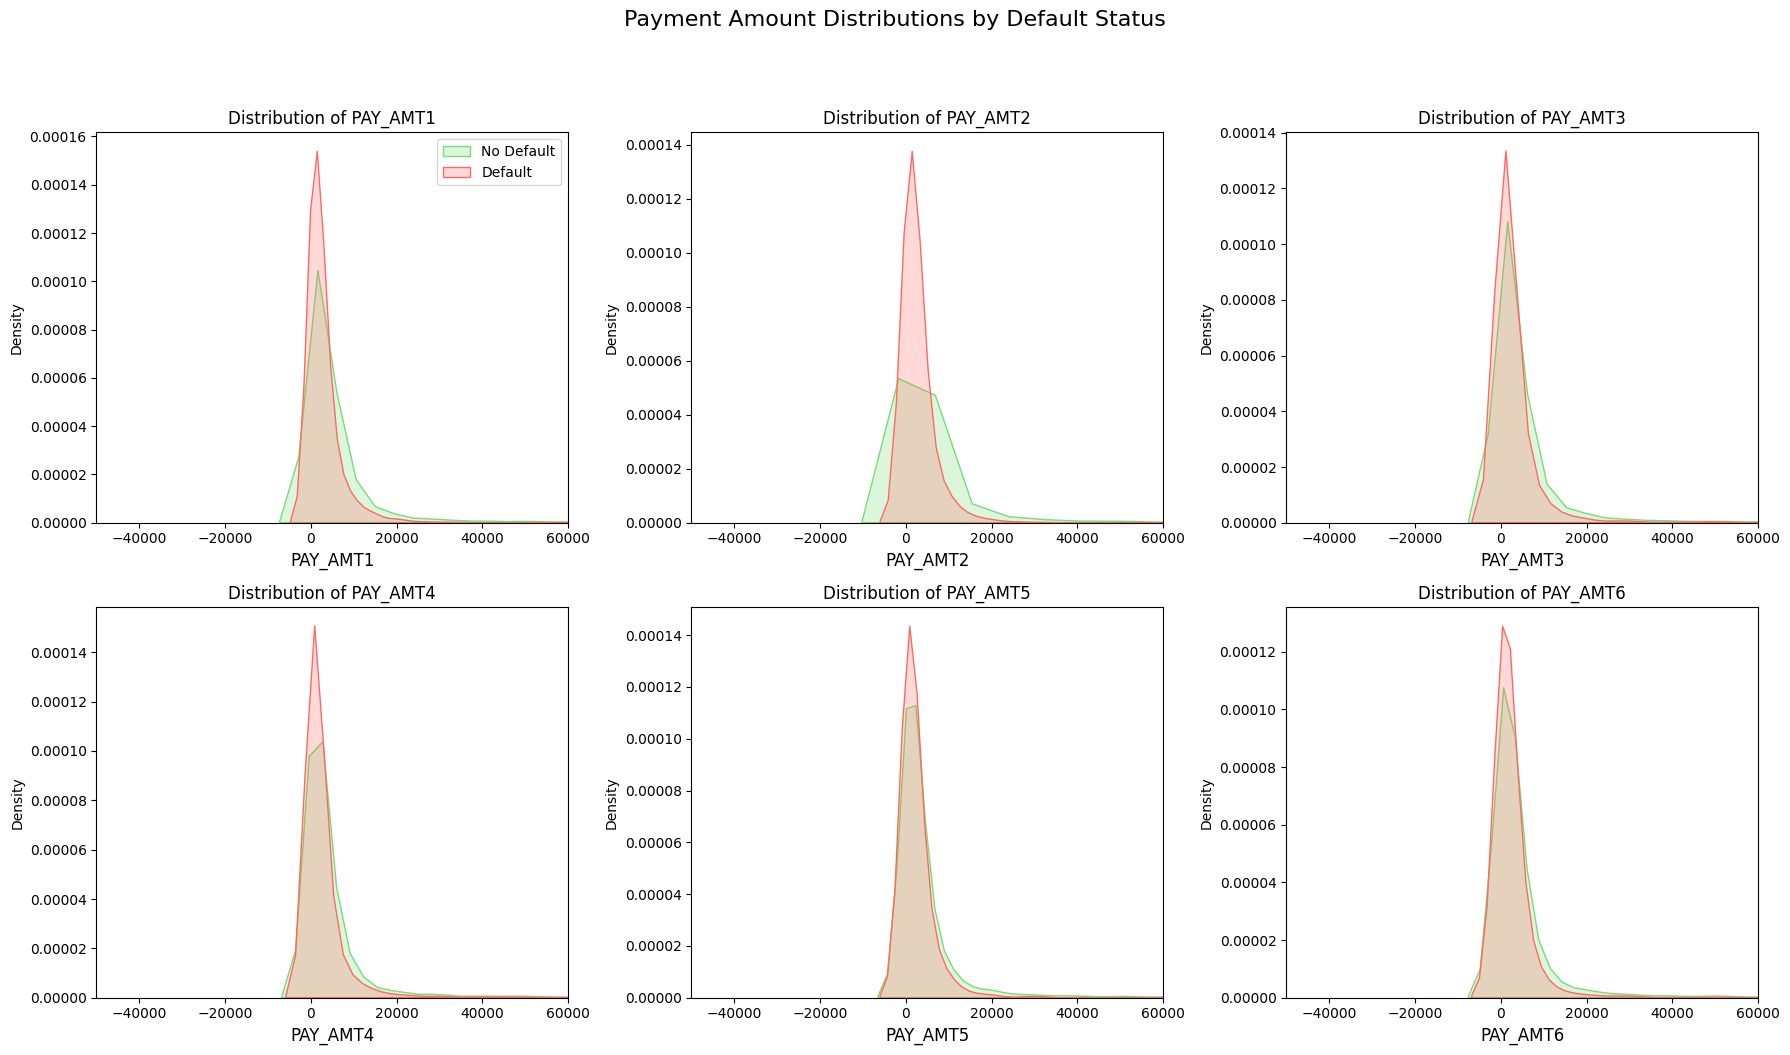

In [26]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(18,10))  # Adjust the size to fit your screen resolution

for i, col in enumerate(PAY_AMT_cols):    
    ax = plt.subplot(2, 3, i + 1)    
    sns.kdeplot(df.loc[df['DEFAULT'] == 0, col], label='No Default', shade=True, color='#77DD76')
    sns.kdeplot(df.loc[df['DEFAULT'] == 1, col], label='Default', shade=True, color='#FF6962')
    plt.xlim(-50000, 60000)  # Payment amounts usually start at 0
    plt.xlabel(col, fontsize=12)
    plt.title(f'Distribution of {col}')  # Add a title to each subplot for clarity
    if i == 0:
        plt.legend()  # Only show legend in the first plot to reduce clutter
    else:
        ax.legend([],[], frameon=False)  # Remove legends for subsequent plots

plt.suptitle('Payment Amount Distributions by Default Status', fontsize=16, y=1.05)  # Add an overall title for the figure
plt.tight_layout()  # Adjust the layout
plt.show()

This KDE plot specifically for PAY_AMT2 shows the distribution of the amount paid in the second month, separated by default status. Here’s an interpretation based on this single plot:

Peak Concentration: Both distributions for No Default and Default have a sharp peak at the lower end of the payment amount spectrum. This implies that most customers, regardless of whether they defaulted or not, tend to make smaller payments.
Density: The peak of the Default group (in orange) is higher than that of the No Default group (in green). This indicates that a higher proportion of customers who defaulted made very small payments in the second month compared to those who did not default.
Skewness: The distributions are right-skewed, indicating that while most payments are small, there are customers who make larger payments, albeit in fewer numbers.
Overlap: There is substantial overlap in the middle range of the distributions, but the peak density is clearly different for the two groups, suggesting some difference in payment behaviors related to defaulting.
Negative Values: The negative values on the x-axis are likely incorrect as payment amounts should not be negative. These might represent data entry errors, refunds, or reversed transactions.
Long Tails: Both groups exhibit long tails stretching toward higher payment amounts, but the number of customers in these higher payment brackets is significantly smaller compared to those making smaller payments.
Implications for Risk Analysis: While the Default distribution's higher peak at the lower end of the payment spectrum suggests that defaults are more common among customers making very small payments, the presence of defaults across the entire spectrum of payment amounts indicates that the amount paid is not a definitive single predictor of default.

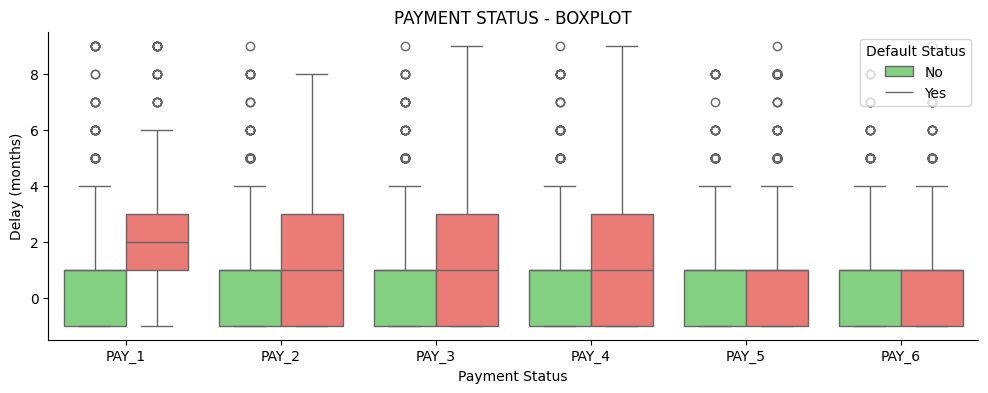

In [27]:
# Assuming df is your main DataFrame
repayment = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']]
repayment = pd.melt(repayment, 
                    id_vars="DEFAULT",
                    var_name="Payment Status",
                    value_name='Delay (months)')

plt.figure(figsize=(12,4))
sns.boxplot(y="Delay (months)", x="Payment Status", hue="DEFAULT", data=repayment, palette=sns.color_palette(('#77DD76','#FF6962')))
plt.title('PAYMENT STATUS - BOXPLOT')
plt.legend(title='Default Status', loc='upper right', labels=['No', 'Yes'])
sns.despine()  # This removes the top and right spines
# plt.savefig('images/BoxplotPAY.svg')
plt.show()

This boxplot visualizes the repayment statuses (PAY_1 through PAY_6) in relation to whether clients defaulted (Yes in red) or not (No in green). Each boxplot is divided into two sections based on the DEFAULT status and aligned side-by-side for each payment period.

Here's how to interpret the boxplot and the rationale behind what it might suggest:

Central Tendency and Spread:
The line in the middle of each box represents the median delay in months. For most periods, the median delay for clients who defaulted is higher than for those who did not.
The height of each box represents the interquartile range (IQR), which is the spread of the middle 50% of the data. A taller box suggests more variability in the delay of payments among clients.
Skewness:
The presence of circles above the boxes, which represent outliers, indicates that there are clients with payment delays much higher than the general population.
Most of the data points for both default and no default are concentrated towards the lower end (closer to 0), which suggests a right-skewed distribution for the delay in months.
Comparison Between Defaults and Non-Defaults:
In earlier periods (PAY_1, PAY_2), the median delay for the default group is significantly higher than for the non-default group, suggesting that early payment behavior could be indicative of potential default.
In later periods (PAY_5, PAY_6), the boxes become more aligned, and the median values are closer. This could indicate that payment behavior converges as time progresses, or that people who are going to default have already done so by this point.
Trends Over Time:
Over time, from PAY_1 to PAY_6, there seems to be a slight downward trend in the median delay for the defaulting group, possibly indicating that clients who continue to delay payments are doing so to a lesser extent as time goes on.
The range of delays (as shown by the IQR and whiskers) for those who eventually default tends to be wider in the initial periods (PAY_1 to PAY_3) than in later periods (PAY_4 to PAY_6).
Policy Implications:
The plots suggest that early detection of payment delays could be key in predicting and preventing future defaults.
The data could be used to identify at-risk clients early on and implement intervention strategies such as payment reminders, debt counseling, or restructuring of debt.
Data Quality:
All boxplots display outliers, which could be legitimate cases of extended delay or could point to potential data errors or extreme cases that may need special attention.
The rationale behind analyzing this boxplot is to identify patterns in payment delays that could correlate with defaulting. It provides insights into which stages of the payment cycle are most critical for default prediction and helps to inform strategies for credit risk management.

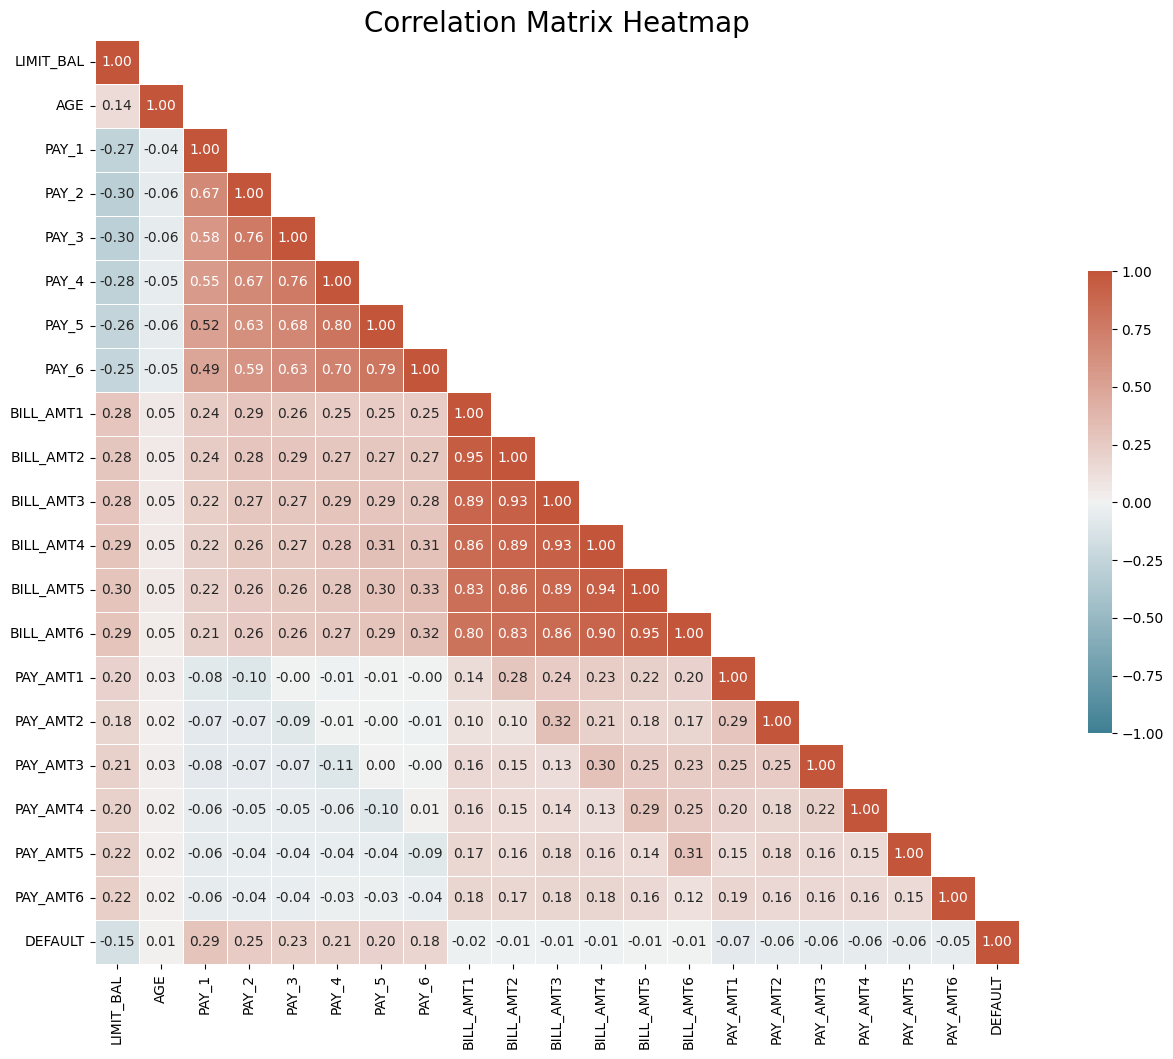

In [28]:
# Calculate correlation matrix for numerical columns
numeric = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']
corr = df[numeric].corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Create the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, 
            linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, 
            annot=True, fmt=".2f")

# Set the title and adjust the title size
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Adjust the tick label size for both axes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the heatmap as an SVG file
# plt.savefig('images/correlation.svg')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


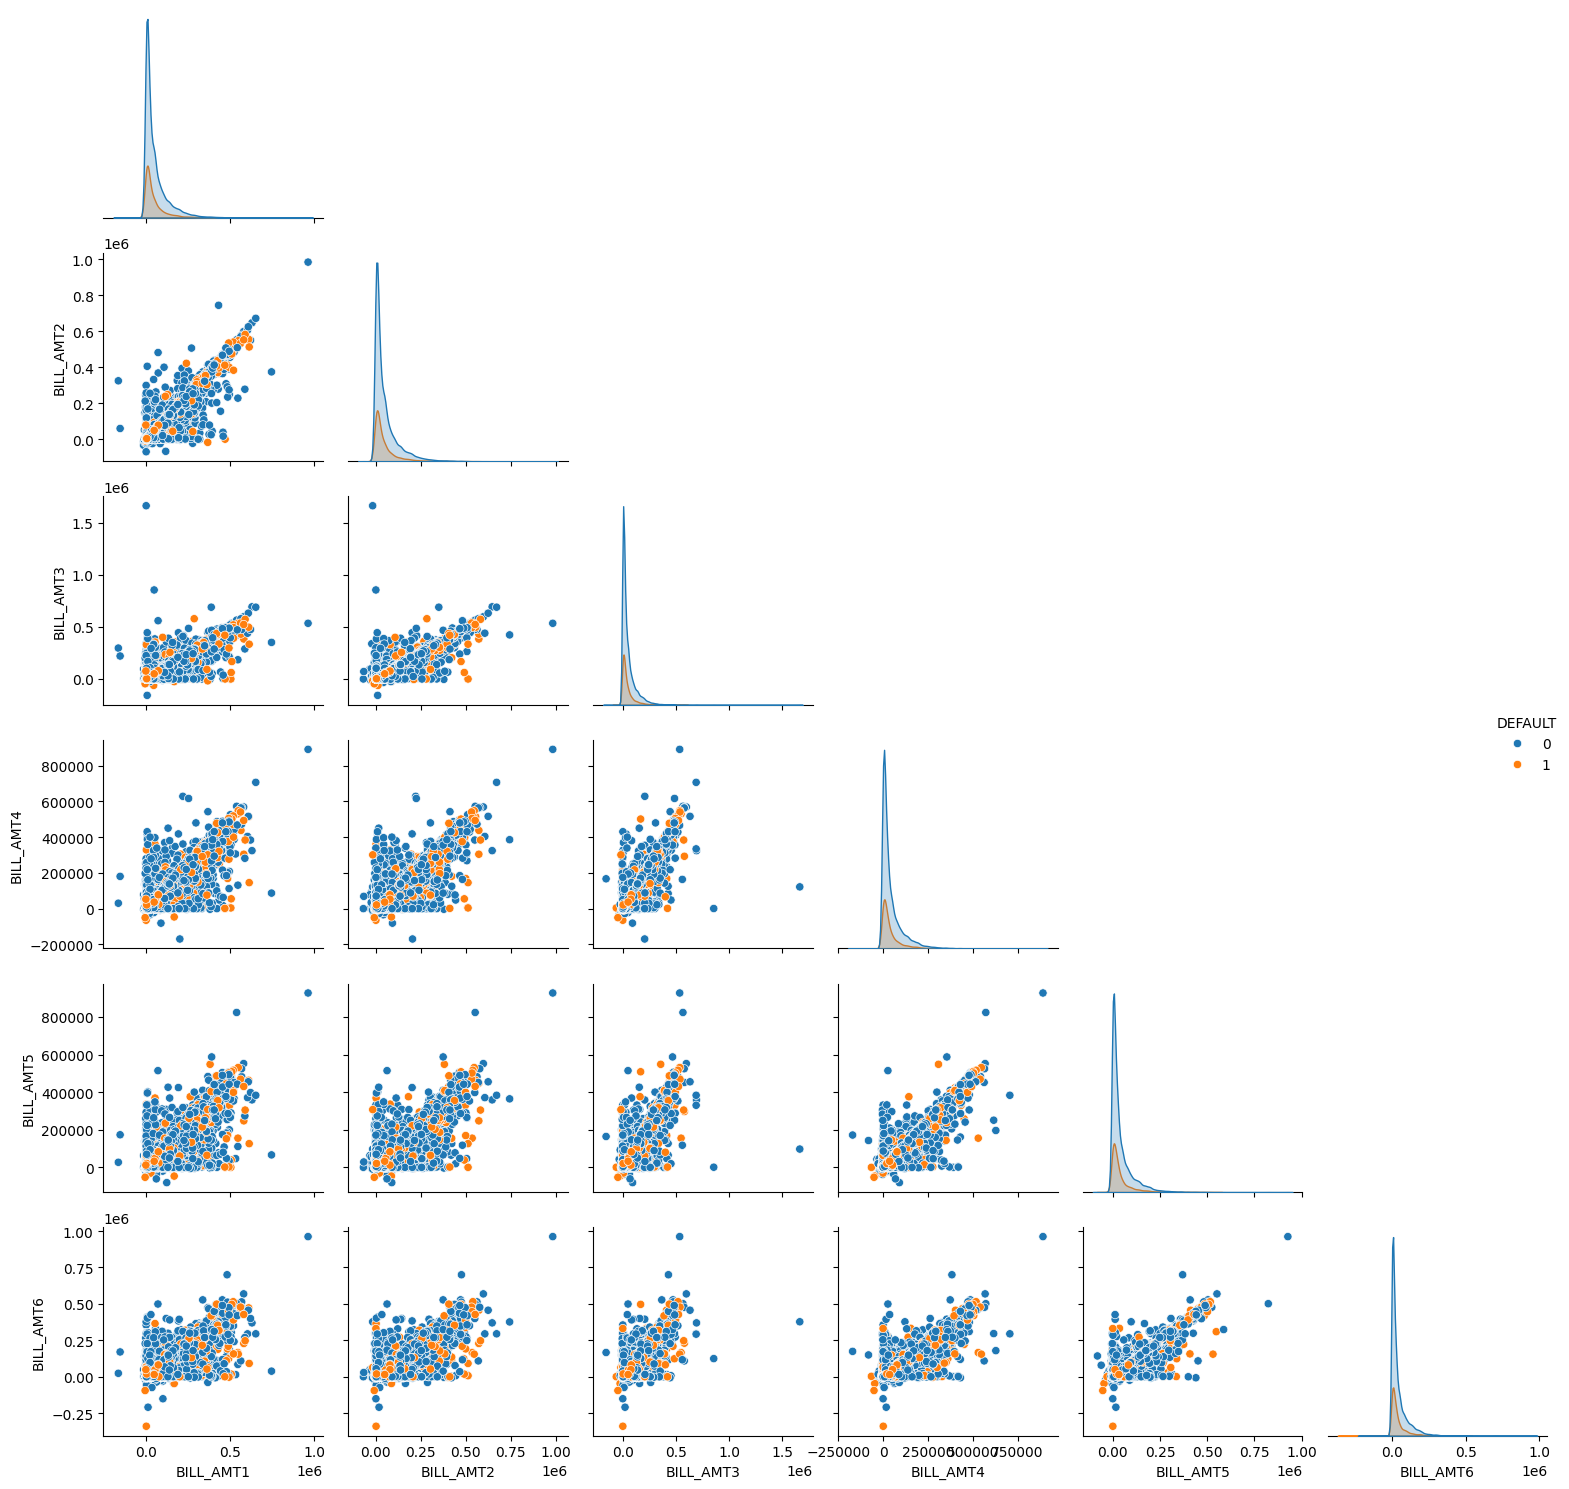

In [29]:
columns_to_plot = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'DEFAULT']
pair_plot = sns.pairplot(df[columns_to_plot], hue='DEFAULT', diag_kind='kde', corner=True)

# Removing the legend can be done by accessing the legend and setting it to None
plt.legend().set_visible(False)

# Adjust the layout to prevent overlap and improve visibility
plt.tight_layout()

# Save the plot as an image file
plt.savefig('images/pairplotBILLAMT.svg')

## Normality Check

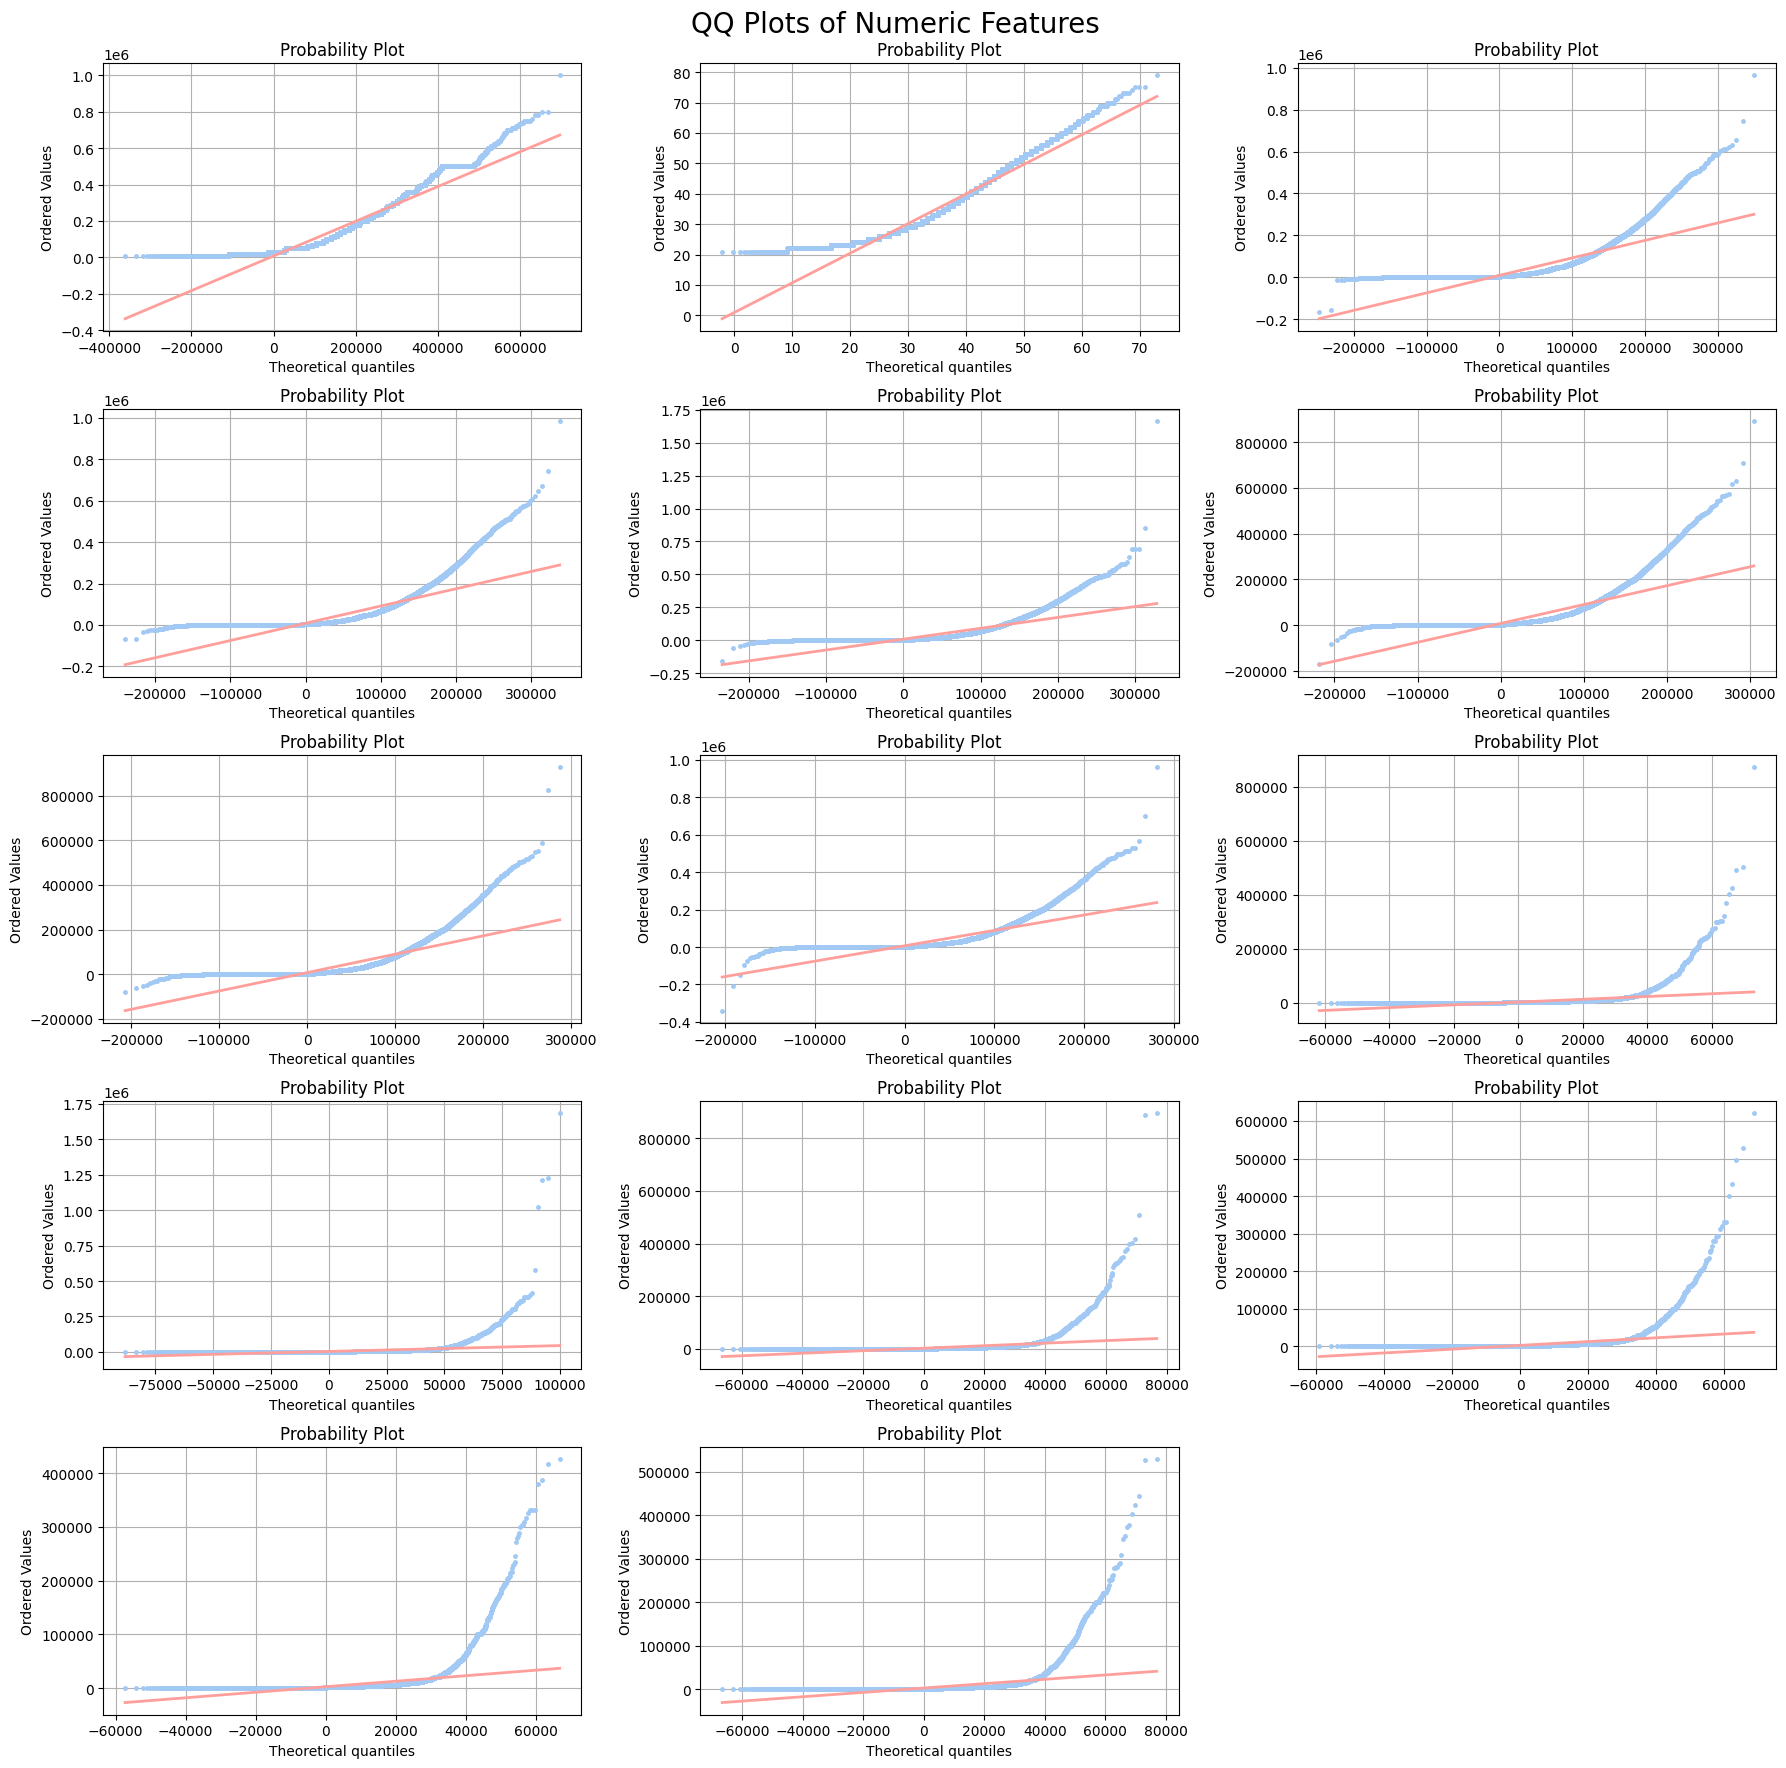

In [30]:
# Set Seaborn color codes to 'pastel'
sns.set_color_codes('pastel')

# Define the list of numeric features
numeric = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Calculate the number of rows and columns for subplots
num_vars = len(numeric)
num_cols = 3
num_rows = num_vars // num_cols + (num_vars % num_cols > 0)

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Loop through the numeric features and create a QQ plot for each
for n, feature in enumerate(numeric):
    row, col = divmod(n, num_cols)
    stats.probplot(df[feature], dist='norm', sparams=(df[feature].mean(), df[feature].std()), plot=axs[row, col])
    axs[row, col].get_lines()[0].set_marker('.')
    axs[row, col].get_lines()[0].set_markersize(5)  # Increase marker size for better visibility
    axs[row, col].get_lines()[1].set_linewidth(2)  # Set the linewidth of the reference line
    axs[row, col].grid(True)  # Turn on the grid

# Turn off any remaining unused axes
for n in range(num_vars, num_rows * num_cols):
    fig.delaxes(axs.flatten()[n])

# Adjust layout to minimize overlap
fig.tight_layout()

# Add a figure title
fig.suptitle('QQ Plots of Numeric Features', fontsize=20)
plt.subplots_adjust(top=0.95)  # Adjust top to fit figure title

# Save the figure
plt.savefig('images/QQplot.png')

# Show the plot
plt.show()

In [31]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,3,3,-1,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,3,1,1,1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,1,1,1,1,1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,1,1,1,1,1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,1,-1,1,1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
df['SEX'].unique()

array([2, 1])

In [33]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [34]:
df['MARRIAGE'].unique()

array([1, 2, 3])

In [35]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype(int)
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype(int)
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype(int)
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype(int)
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype(int)
df.drop('MARRIAGE', axis=1, inplace=True)

# Display the first few rows of the dataframe
df.head()


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3,3,-1,-1,-1,-1,3913,3102,...,0,0,0,0,1,0,1,0,0,1
2,120000,26,-1,3,1,1,1,3,2682,1725,...,1000,1000,0,2000,1,0,1,0,0,0
3,90000,34,1,1,1,1,1,1,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
4,50000,37,1,1,1,1,1,1,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
5,50000,57,-1,1,-1,1,1,1,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1


In [36]:
# Defining the features and target variable
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1)

# Splitting the dataset into training and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)

# Print training and test set shapes and counts
print(f'Training set shape: {X_train_raw.shape}')
print(f'- Defaulters: {y_train.sum()}')
print(f'- Non-defaulters: {len(y_train) - y_train.sum()}')
print(f'Test set shape: {X_test_raw.shape}')
print(f'- Defaulters: {y_test.sum()}')
print(f'- Non-defaulters: {len(y_test) - y_test.sum()}')

Training set shape: (22200, 25)
- Defaulters: 4954
- Non-defaulters: 17246
Test set shape: (7401, 25)
- Defaulters: 1651
- Non-defaulters: 5750


### Feature Scaling

#### using min max scaler

In [37]:
# Initialize the scaler
scaler = MinMaxScaler()

# Create copies of the raw training and test data
X_train_norm = X_train_raw.copy()
X_test_norm = X_test_raw.copy()

# List of column types with similar processing needs
columns_list = [('LIMIT_BAL', 'AGE')] + [('PAY_' + str(i), 'BILL_AMT' + str(i), 'PAY_AMT' + str(i)) for i in range(1, 7)]

# Apply MinMax scaling
for columns in columns_list:
    for column in columns:
        # Fit the scaler on the training data and transform both train and test data.
        X_train_norm[column] = scaler.fit_transform(X_train_raw[column].values.reshape(-1, 1))
        X_test_norm[column] = scaler.transform(X_test_raw[column].values.reshape(-1, 1))

# Note: The first tuple in columns_list is processed separately here to illustrate handling of different column types or special cases.

#### using robust scaler

In [38]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Create copies of the raw training and test data
X_train_rob = X_train_raw.copy()
X_test_rob = X_test_raw.copy()

# List of all columns that you want to scale
columns_list = ['LIMIT_BAL', 'AGE'] + [f'PAY_{i}' for i in range(1, 7)] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Apply Robust scaling
for column in columns_list:
    # Fit the scaler on the training data and transform both train and test data.
    X_train_rob[column] = scaler.fit_transform(X_train_raw[column].values.reshape(-1, 1))
    X_test_rob[column] = scaler.transform(X_test_raw[column].values.reshape(-1, 1))

# Note: RobustScaler is used here as it is less sensitive to outliers in the data.


#### using standard scaler

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Create copies of the raw training and test data
X_train_std = X_train_raw.copy()
X_test_std = X_test_raw.copy()

# List of column groups to scale
column_groups = ['LIMIT_BAL', 'AGE'] + [f'PAY_{i}' for i in range(1, 7)] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Scale each column group
for col in column_groups:
    # Fit the scaler on the training data and transform both train and test data.
    X_train_std[col] = scaler.fit_transform(X_train_raw[col].values.reshape(-1, 1))
    X_test_std[col] = scaler.transform(X_test_raw[col].values.reshape(-1, 1))

# Note: This method ensures that the scaler is fitted only on training data to prevent data leakage to the model.

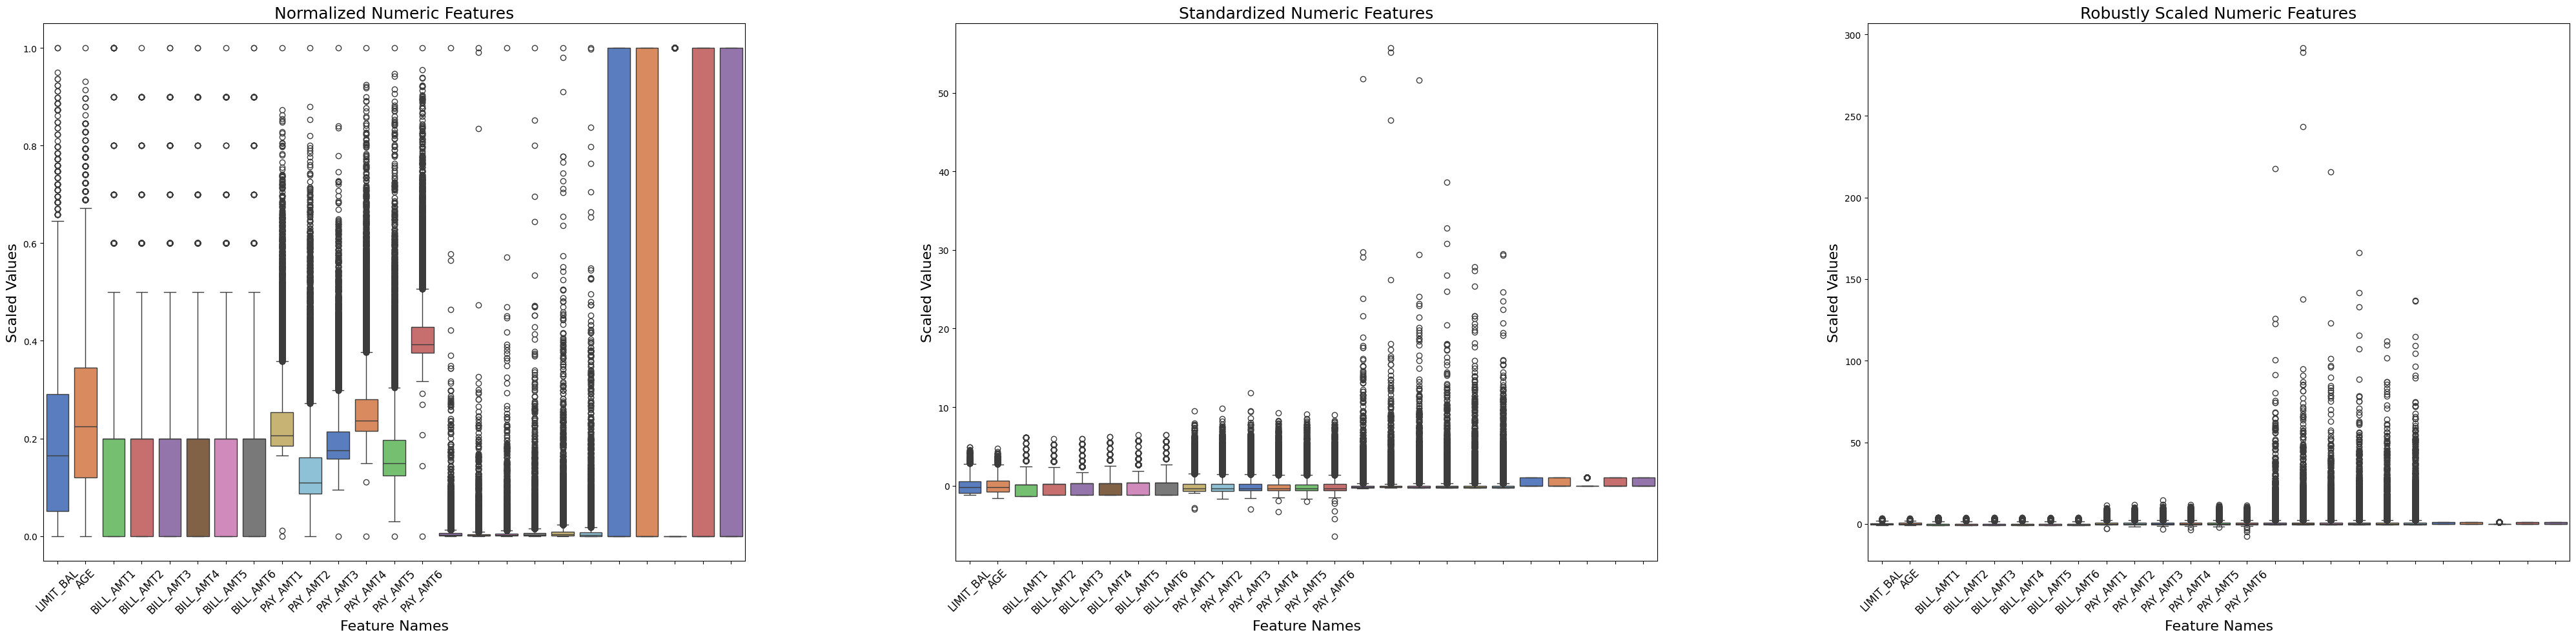

In [40]:
# Create a large figure to accommodate the detailed plots
fig, axs = plt.subplots(1, 3, figsize=(40, 10))  # Increased figure size

# Normalized data plot
sns.boxplot(data=X_train_norm, ax=axs[0], palette='muted')
axs[0].set_title('Normalized Numeric Features', fontsize=18)
axs[0].set_xticklabels(labels=numeric, rotation=45, fontsize=12)
axs[0].set_xlabel('Feature Names', fontsize=16)
axs[0].set_ylabel('Scaled Values', fontsize=16)

# Standardized data plot
sns.boxplot(data=X_train_std, ax=axs[1], palette='muted')
axs[1].set_title('Standardized Numeric Features', fontsize=18)
axs[1].set_xticklabels(labels=numeric, rotation=45, fontsize=12)
axs[1].set_xlabel('Feature Names', fontsize=16)
axs[1].set_ylabel('Scaled Values', fontsize=16)

# Robustly scaled data plot
sns.boxplot(data=X_train_rob, ax=axs[2], palette='muted')
axs[2].set_title('Robustly Scaled Numeric Features', fontsize=18)
axs[2].set_xticklabels(labels=numeric, rotation=45, fontsize=12)
axs[2].set_xlabel('Feature Names', fontsize=16)
axs[2].set_ylabel('Scaled Values', fontsize=16)

# Adjust layout spacing to prevent overlap and ensure everything is visible
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust horizontal space between plots

# Save the figure
plt.savefig('images/scaling_comparison_large.svg')
plt.show()

## PCA

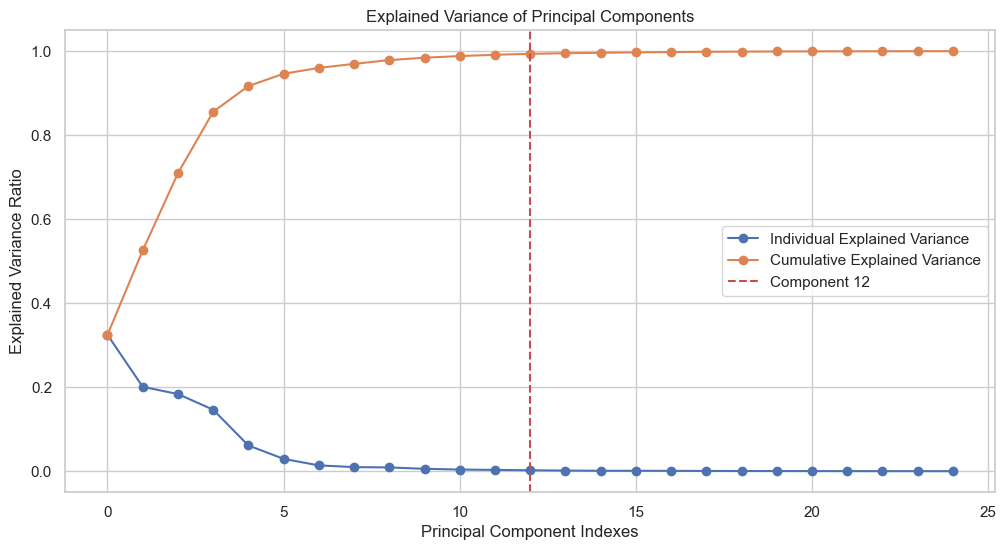

In [41]:
from sklearn.decomposition import PCA

pc = len(X_train_norm.columns)  # number of columns = 25
pca = PCA(n_components=pc)
pca.fit(X_train_norm)

# Reset to default matplotlib settings with Seaborn color enhancements
sns.set(style="whitegrid", color_codes='pastel')

# Create the plot
plt.figure(figsize=(12,6))  # Adjusted size for better visibility
plt.grid(True)
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o', label="Individual Explained Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', label="Cumulative Explained Variance")
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.axvline(12, color='r', linestyle='--', label='Component 12')  # Move axvline before tight_layout
plt.legend()


In [42]:
# Assuming `pca` and `pc` are already defined with PCA results
cumsum = np.cumsum(pca.explained_variance_ratio_)
indexes = ['PC' + str(i) for i in range(1, pc+1)]
cumsum_df = pd.DataFrame(data=cumsum, index=indexes, columns=['Cumulative Explained Variance'])

# Format directly to percentages in one step without intermediate columns
cumsum_df['Cumulative Explained Variance'] = cumsum_df['Cumulative Explained Variance'].apply(lambda x: f"{x * 100:.2f}%")

# Display the DataFrame transposed for better visibility of headers and first 15 components
display_df = cumsum_df.T.iloc[:, :15]
display_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Cumulative Explained Variance,32.46%,52.56%,70.93%,85.57%,91.69%,94.63%,96.01%,96.98%,97.88%,98.44%,98.84%,99.14%,99.36%,99.51%,99.61%


In [43]:
# used X_train features using robuust scaling
# Number of principal components
pc = 12

# Initialize PCA with 12 components
pca = PCA(n_components=pc)

# Fit PCA on normalized training data and transform both training and testing datasets
X_train = pd.DataFrame(pca.fit_transform(X_train_rob),
                       columns=['PC' + str(i) for i in range(1, pc+1)])
X_test = pd.DataFrame(pca.transform(X_test_rob),
                      columns=['PC' + str(i) for i in range(1, pc+1)])

# Display the first five rows of the transformed training dataset
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,6.111106,-2.503396,-1.623506,1.139673,0.135679,0.444821,-10.312510,-2.058806,-0.840913,-0.324982,-1.344398,0.247143
1,3.528689,2.423638,-1.989071,-0.277577,-6.854222,-7.800082,2.135443,-1.166389,-0.586784,0.607799,-0.698225,-0.122269
2,4.829711,-2.664057,-12.265519,-7.622023,7.989878,1.143337,-1.305286,-0.196394,-1.058616,1.475931,1.624830,0.147275
3,-0.923658,-0.316365,0.476593,3.097520,1.778673,-0.377562,2.282756,-1.341368,-0.398392,-0.295272,0.113487,0.728126
4,-3.308173,0.707220,0.425227,-0.369397,0.041201,-0.208263,0.803088,-0.988027,0.060114,1.528606,0.181777,0.199327


## Handling class imbalance problem

In [44]:
# Calculate class counts
class_count = y_train.value_counts().sort_index()

# Create DataFrame with meaningful index names
# Ensure that class_count indices match the intended new indices
if 0 in class_count and 1 in class_count:
    class_count_df = pd.DataFrame({
        'Number': [class_count[0], class_count[1]],
    }, index=['Non-defaulters', 'Defaulters'])
else:
    # Handle cases where one of the classes might not exist
    missing_classes = {0: 0, 1: 0}
    missing_classes.update(class_count)
    class_count_df = pd.DataFrame({
        'Number': [missing_classes[0], missing_classes[1]],
    }, index=['Non-defaulters', 'Defaulters'])

# Calculate percentage
class_count_df['Percentage'] = (class_count_df['Number'] / class_count_df['Number'].sum() * 100).astype(str) + '%'

# Print results
print('Training set class proportion')
print(class_count_df)

Training set class proportion
                Number           Percentage
Non-defaulters   17246   77.68468468468468%
Defaulters        4954  22.315315315315313%


In [45]:
from imblearn.under_sampling import ClusterCentroids

# Assuming X_train and y_train are defined and are your feature and target datasets respectively
# Initialize ClusterCentroids with a random state for reproducibility
oversample = ClusterCentroids(random_state=24)

# Apply undersampling
X_train_cc, y_train_cc = oversample.fit_resample(X_train, y_train)

# Compute class counts directly with value_counts, ensuring correct indices
class_counts = y_train_cc.value_counts()
class_count_df = pd.DataFrame({
    'Number': class_counts,
    'Percentage': (class_counts / class_counts.sum() * 100).round(2).astype(str) + '%'
})
class_count_df.index = ['Non-defaulters' if idx == 0 else 'Defaulters' for idx in class_count_df.index]  # Set index names based on your class labels

print('Training set class proportion after Cluster Centroid Undersampling')
print(class_count_df)

Training set class proportion after Cluster Centroid Undersampling
                Number Percentage
Non-defaulters    4954      50.0%
Defaulters        4954      50.0%


In [46]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are defined
# Initialize SMOTE with a random state for reproducibility
oversample = SMOTE(random_state=24)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# Calculate class counts and directly compute percentages
class_counts = y_train_smote.value_counts()
class_count_df = pd.DataFrame({
    'Number': class_counts,
    'Percentage': (class_counts / class_counts.sum() * 100).round(2).astype(str) + '%'
})
class_count_df.index = ['Non-defaulters' if idx == 0 else 'Defaulters' for idx in class_count_df.index]  # Set index names based on your class labels


# Output the class proportions after SMOTE oversampling
print('Training set class proportion after SMOTE Oversampling')
print(class_count_df)

Training set class proportion after SMOTE Oversampling
                Number Percentage
Non-defaulters   17246      50.0%
Defaulters       17246      50.0%


In [47]:
from imblearn.over_sampling import KMeansSMOTE

# Assuming X_train and y_train are properly defined
# Initialize KMeansSMOTE with a very low cluster_balance_threshold and a random state for reproducibility
oversample = KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24)

# Apply KMeansSMOTE to the training data
X_train_ksmote, y_train_ksmote = oversample.fit_resample(X_train, y_train)

# Calculate class counts using value_counts which automatically aligns the indices correctly
class_counts = y_train_ksmote.value_counts().sort_index()

# Create a DataFrame with calculated percentages
class_count_df = pd.DataFrame({
    'Number': class_counts,
    'Percentage': ((class_counts / class_counts.sum()) * 100).round(2).astype(str) + '%'
})
class_count_df.index = ['Non-defaulters' if idx == 0 else 'Defaulters' for idx in class_count_df.index]  # Set index names based on your class labels


# Output the class proportions after KMeansSMOTE oversampling
print('Training set class proportion after K-means SMOTE Oversampling')
print(class_count_df)


Training set class proportion after K-means SMOTE Oversampling
                Number Percentage
Non-defaulters   17246     49.99%
Defaulters       17251     50.01%


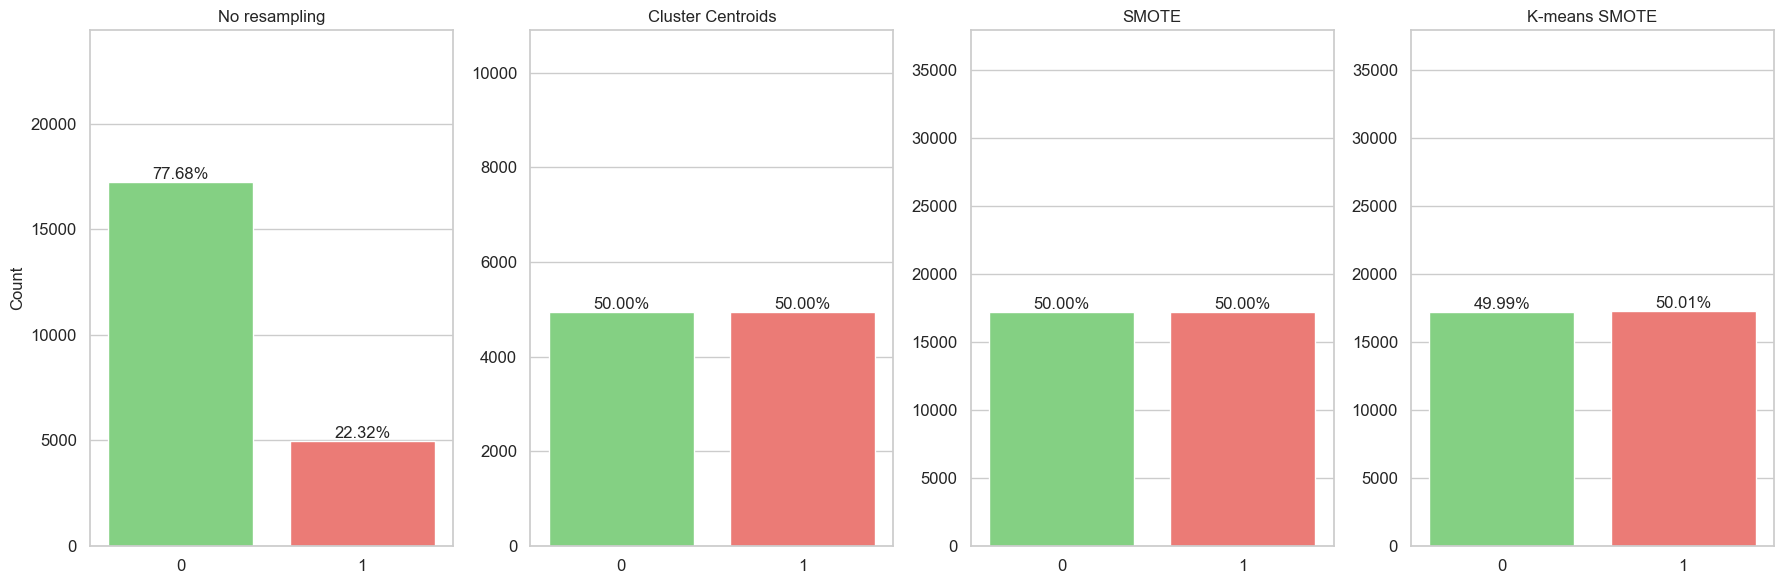

In [48]:
y_list = [y_train, y_train_cc, y_train_smote, y_train_ksmote]
y_list_labels = ['No resampling', 'Cluster Centroids', 'SMOTE', 'K-means SMOTE']

plt.figure(figsize=(18, 6))  # Adjusted for better visibility

for idx, (value, label) in enumerate(zip(y_list, y_list_labels)):
    plt.subplot(1, 4, idx + 1)
    graph_target = sns.countplot(x=value, palette=['#77DD76', '#FF6962'])
    plt.title(label)
    plt.xlabel('')
    plt.ylabel('Count' if idx == 0 else '')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Annotate each bar with the percentage
    for p in graph_target.patches:
        height = p.get_height() or 0  # Use 0 if height is None (no bar)
        percentage = f'{100 * height / value.size:.2f}%'  # Calculate percentage
        plt.text(p.get_x() + p.get_width() / 2, height, percentage, ha="center", va="bottom", fontsize=12)

    plt.ylim(0, value.size * 1.1)  # Scale y-axis to fit annotations

plt.tight_layout()
plt.savefig('images/resamplingDataset.svg')
plt.show()

### Function to Plot Model Performance Summary

In [49]:
def plot_summary(results, resampling_names, y_test, y_pred):
    """Plots F1-scores and confusion matrix for different resampling methods."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

    # Bar chart for F1-scores
    f1_scores = pd.DataFrame({
        'F1 Score': results,
        'Resampling Method': resampling_names
    })
    sns.barplot(data=f1_scores, x='F1 Score', y='Resampling Method', palette='Greens_r', ax=ax1)
    ax1.set_title('F1 Score by Resampling Method')
    ax1.set_xlabel('F1 Score')
    ax1.set_ylabel('')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax2)
    ax2.set_title('Confusion Matrix')
    ax2.set_xlabel('Predicted labels')
    ax2.set_ylabel('True labels')

    plt.tight_layout()
    plt.show()


### Function to Evaluate and Plot Test Scores

In [50]:
def evaluate_model(model, X_test, y_test, plot=True):
    """Evaluates the model on test data and optionally plots additional diagnostics."""
    # Model predictions
    y_pred = model.predict(X_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    # Print test scores
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {auc_score:.2f}")

    if plot:
        plt.figure(figsize=(12, 5))
        ax1 = plt.subplot(121)
        plot_confusion_matrix(model, X_test, y_test, cmap='Greens', ax=ax1)

        ax2 = plt.subplot(122)
        plot_roc_curve(model, X_test, y_test, ax=ax2)
        plt.tight_layout()
        plt.show()

    return accuracy, precision, recall, f1, auc_score


###  Pipeline Function for Model Training and Evaluation

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def run_model_pipeline(model, params, oversampler=None, plot=False):
    """
    Runs a full model training and evaluation pipeline with optional resampling and hyperparameter tuning.

    Args:
        model (estimator): The machine learning model to train.
        params (dict): Hyperparameters to tune.
        X_train (DataFrame): Training features.
        y_train (Series): Training labels.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing labels.
        oversampler (function, optional): The oversampling technique to apply.
        plot (bool, optional): If True, plots model evaluation metrics.

    Returns:
        tuple: Contains model evaluation scores, predictions, and actual test labels.
    """
    # Determine training and test data based on whether oversampling is applied
    if oversampler and oversampler != 'raw':
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
        X_test_resampled = X_test
    elif oversampler == 'raw':
        # Assuming 'raw' means using preprocessed but not resampled data
        X_train_resampled = X_train_rob.copy()  # Scaled or preprocessed training data
        y_train_resampled = y_train.copy()
        X_test_resampled = X_test_rob.copy()  # Corresponding test data
    else:
        # No resampling, use the data as is with PCA
        X_train_resampled = X_train.copy()
        y_train_resampled = y_train
        X_test_resampled = X_test

    # Initialize and run GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=5, n_jobs=-1, verbose=True)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Output best hyperparameter settings and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score: {grid_search.best_score_:.2f}")

    # Evaluate the best estimator on the test set
    y_pred = grid_search.best_estimator_.predict(X_test_resampled)
    f1 = f1_score(y_test, y_pred)

    # Plot results if required
    if plot:
        plot_test_scores(grid_search.best_estimator_, X_test_resampled, y_test)

    # Return the model's test scores and the predictions for the best model
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1,
        'auc_score': roc_auc_score(y_test, y_pred)
    }, y_pred, y_test

# Helper function to plot test scores and metrics
def plot_test_scores(model, X_test, y_test):
    """Plots confusion matrix and ROC curve for the given model and test data."""
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plot_confusion_matrix(model, X_test, y_test, ax=axs[0], cmap='Greens', normalize='true')
    plot_roc_curve(model, X_test, y_test, ax=axs[1])
    plt.tight_layout()
    plt.show()


Logistic Regression with Raw data
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1.0}
Best cross-validation F1 score: 0.28
Logistic Regression with PCA
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 1.0}
Best cross-validation F1 score: 0.19
Logistic Regression with PCA + SMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1}
Best cross-validation F1 score: 0.64
Logistic Regression with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.01}
Best cross-validation F1 score: 0.71
Logistic Regression with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.001}
Best cross-validation F1 score: 0.81


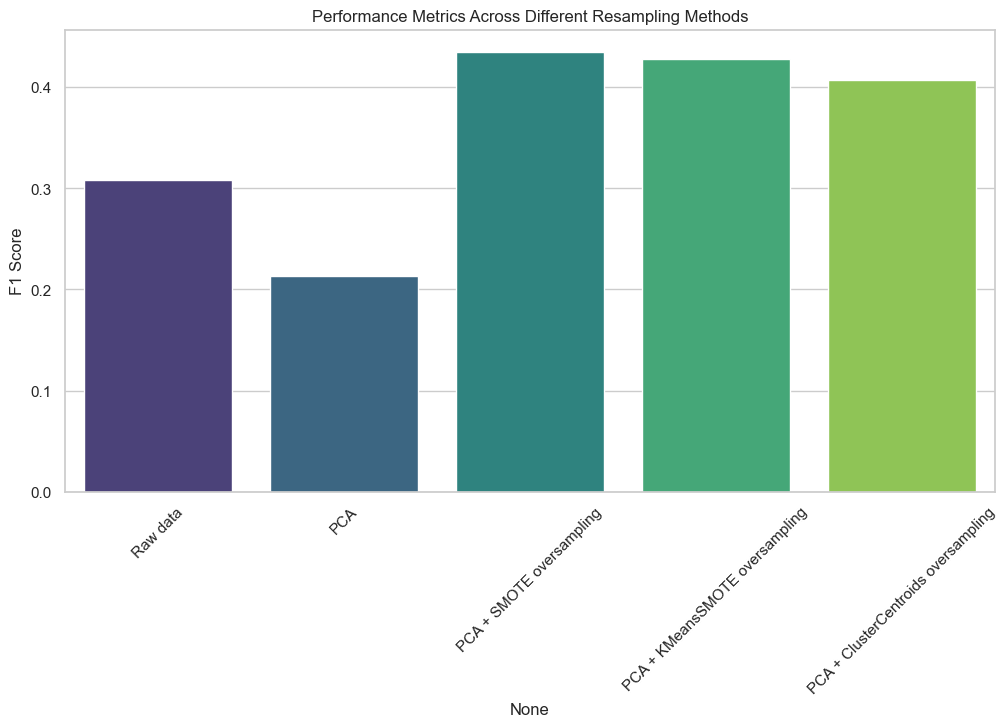

                                     Accuracy    Recall  Precision  F1-score  \
Raw data                             0.804621  0.195033   0.733485  0.308134   
PCA                                  0.792731  0.125984   0.695652  0.213333   
PCA + SMOTE oversampling             0.615863  0.663234   0.323773  0.435128   
PCA + KMeansSMOTE oversampling       0.614647  0.645669   0.319832  0.427769   
PCA + ClusterCentroids oversampling  0.434941  0.868565   0.265605  0.406809   

                                          AUC  
Raw data                             0.587343  
PCA                                  0.555079  
PCA + SMOTE oversampling             0.632748  
PCA + KMeansSMOTE oversampling       0.625704  
PCA + ClusterCentroids oversampling  0.589500  


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


# Define the oversampling methods and names
oversample_methods = [
    'raw',  # Placeholder for raw data
    None,  # Placeholder for data processed with PCA but no oversampling
    SMOTE(random_state=24),
    KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
    ClusterCentroids(random_state=24)
]
oversample_names = [
    'Raw data',
    'PCA',
    'PCA + SMOTE oversampling',
    'PCA + KMeansSMOTE oversampling',
    'PCA + ClusterCentroids oversampling'
]

# Initialize dictionary to store scores
scores_lr = {
    'Accuracy': [0.0] * len(oversample_methods),
    'Recall': [0.0] * len(oversample_methods),
    'Precision': [0.0] * len(oversample_methods),
    'F1-score': [0.0] * len(oversample_methods),
    'AUC': [0.0] * len(oversample_methods)
}

# Hyperparameters for Logistic Regression
params_lr = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

# Loop through each oversampling method and train model
for idx, oversample in enumerate(oversample_methods):
    print(f"Logistic Regression with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = run_model_pipeline(LogisticRegression(random_state=24, max_iter=1000),
                                              params_lr,
                                              oversample)
    scores_lr['Accuracy'][idx] = scores['accuracy']
    scores_lr['Recall'][idx] = scores['recall']
    scores_lr['Precision'][idx] = scores['precision']
    scores_lr['F1-score'][idx] = scores['f1_score']
    scores_lr['AUC'][idx] = scores['auc_score']

# Create DataFrame from scores
scores_lr_df = pd.DataFrame(scores_lr, index=oversample_names)

# Plot and save the summary of results
plt.figure(figsize=(12, 6))
sns.barplot(data=scores_lr_df, x=scores_lr_df.index, y="F1-score", palette="viridis")
plt.xticks(rotation=45)
plt.title("Performance Metrics Across Different Resampling Methods")
plt.ylabel("F1 Score")
plt.savefig("images/summaryLogReg.svg")
plt.show()

# Display scores DataFrame
print(scores_lr_df)


Metrics:
Accuracy: Reflects the overall proportion of true results (both true positives and true negatives) among the total number of cases examined.
Recall (Sensitivity): Indicates the proportion of actual positives correctly identified by the model.
Precision: Measures the proportion of positive identifications that were actually correct.
F1-score: Harmonic mean of precision and recall, providing a balance between them; particularly useful when the class distribution is imbalanced.
AUC (Area Under the Curve): Represents the area under the ROC curve; a measure of the ability of the model to discriminate between the classes.
Interpretation of Results:
Raw Data and PCA:

Accuracy: The models with raw data and PCA-processed data (without any oversampling) show the highest accuracy (~79.27%). This suggests that for the majority class, these models perform well.
Recall: Both have very low recall (12.6%), indicating that while the models are good at predicting the majority class, they fail to correctly identify a large portion of the actual positive (minority) class.
Precision: Reasonably high (~69.57%), meaning that when these models predict a positive class, they are correct about two-thirds of the time.
F1-score and AUC: Both metrics are relatively low, indicating poor overall performance in handling class imbalance. The models are not effective in distinguishing between the classes beyond a modest level.
PCA with SMOTE, KMeansSMOTE, and ClusterCentroids:

Accuracy: Noticeably lower for models using SMOTE and its variants compared to raw/PCA-only models. This is often a trade-off when models start to correctly identify more of the minority class.
Recall: Significantly higher for all three methods compared to the raw data/PCA methods, especially with ClusterCentroids (~86.8%). This suggests that these oversampling techniques are more effective at identifying true positives.
Precision: Drops substantially for these methods. This lower precision indicates that while the models are identifying more true positives, they are also increasing the number of false positives.
F1-score: Despite lower precision, the F1-scores are higher compared to the raw/PCA-only models because the gain in recall outweighs the loss in precision. This is indicative of a more balanced model performance concerning both positive and negative classes.
AUC: Shows improvement, especially with SMOTE and KMeansSMOTE, indicating better discriminative ability compared to the simpler models.
Conclusion:
Models using SMOTE, KMeansSMOTE, and ClusterCentroids show improved recall and AUC, indicating they are better at classifying the minority class correctly compared to the models trained on raw and PCA-only data.
The trade-off is visible in precision, where the models become less precise in their positive predictions.
These results suggest that when dealing with imbalanced data, employing resampling techniques like SMOTE can enhance the model's ability to identify the minority class more effectively, albeit at the expense of making more false positive errors.
Choosing the right model depends on the specific requirements of your application—whether you need higher recall (e.g., in medical diagnostics or fraud detection where missing an actual positive case can be costly) or higher precision (e.g., in marketing campaigns where false positives may lead to wasted resources

### SVM

In [86]:
from sklearn.svm import SVC

In [85]:
# Define the oversampling methods and their names
oversample_method = ['raw', None, 'smote', 'kmeans_smote', 'cluster_centroids']
oversample_names = ['Raw data', 'PCA', 'PCA + SMOTE oversampling', 'PCA + KMeansSMOTE oversampling', 'PCA + ClusterCentroids oversampling']

# Initialize a dictionary to hold the scores
scores_svm = {'Accuracy' : [0.0 for _ in range(len(oversample_method))],
             'Recall' : [0.0 for _ in range(len(oversample_method))],
             'Precision' : [0.0 for _ in range(len(oversample_method))], 
             'F1-score' : [0.0 for _ in range(len(oversample_method))],
             'AUC' : [0.0 for _ in range(len(oversample_method))],}

# Define the SVM parameters for grid search
params_svm = {'C': [1e-1, 1e0, 1e1, 1e2], 
              'kernel': ['rbf', 'poly'], 
              'gamma': [1e-1, 'scale']}

In [88]:
# Perform the pipeline for each oversampling method
for idx, oversample in enumerate(oversample_method):
    print(f"Support Vector Machine with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = run_model_pipeline(SVC(), params_svm, oversample)
    scores_svm['Accuracy'][idx] = scores[0]
    scores_svm['Recall'][idx] = scores[1]
    scores_svm['Precision'][idx] = scores[2]
    scores_svm['F1-score'][idx] = scores[3]
    scores_svm['AUC'][idx] = scores[4]
    
# Create a DataFrame from the scores
scores_svm_df = pd.DataFrame(data=scores_svm, index=oversample_names)

Support Vector Machine with Raw data
Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [89]:
# Function to plot the summary
def plot_summary(f1_scores, oversample_names, y_pred_max, y_test_max):
    plt.figure(figsize=(10, 6))
    plt.barh(oversample_names, f1_scores, color='skyblue')
    plt.xlabel('F1-score')
    plt.title('F1-score for different oversampling methods with SVM')
    plt.tight_layout()
    plt.savefig("/mnt/data/summarySVM.svg")
    plt.show()

# Plot the F1-scores
plot_summary(scores_svm_df["F1-score"], oversample_names, None, None)

import ace_tools as tools; tools.display_dataframe_to_user(name="SVM Scores DataFrame", dataframe=scores_svm_df)

scores_svm_df

NameError: name 'scores_svm_df' is not defined

### Decision Tree

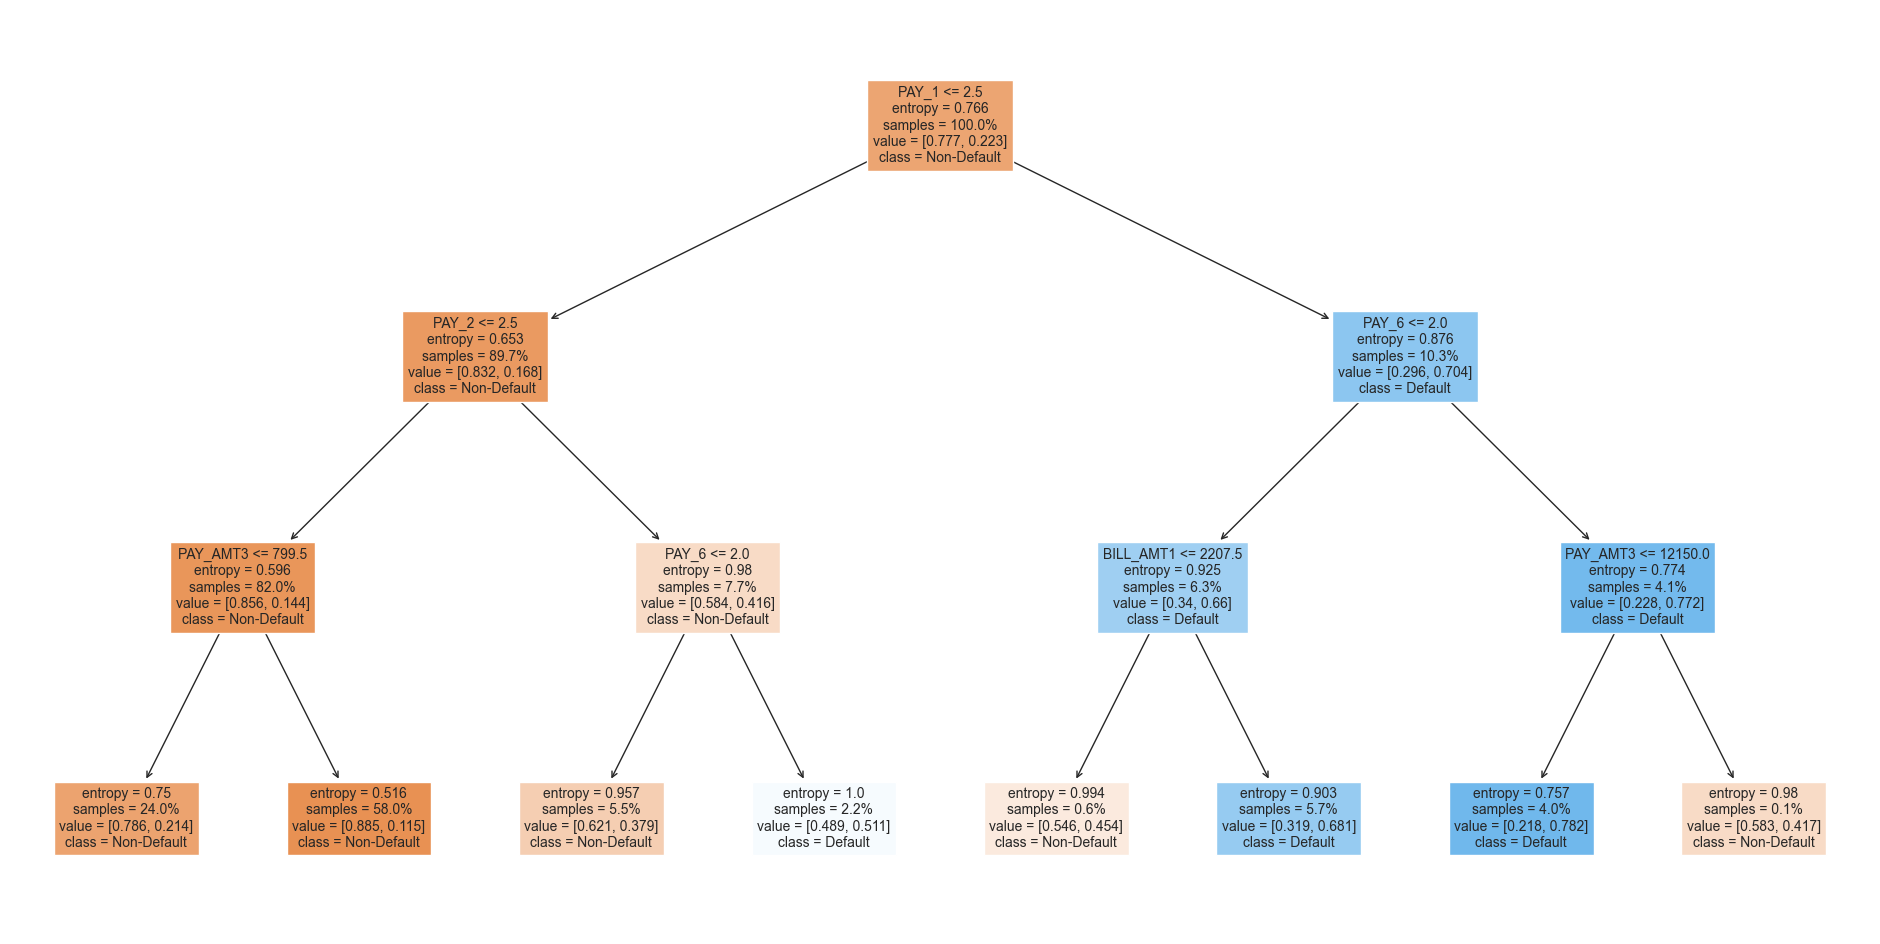

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize and fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', max_features=None)
clf.fit(X_train_raw, y_train)  # Assuming X_train_raw and y_train are already defined

# Set up the plot with specified size
plt.figure(figsize=(24, 12))

# Plot the tree
plot_tree(decision_tree=clf,
          feature_names=X_train_raw.columns, 
          class_names=['Non-Default', 'Default'],
          filled=True, 
          proportion=True, 
          fontsize=10)  # Adjust font size for better readability if needed

plt.show()


In [73]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# # from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# # need to work on fixing this
# from sklearn.metrics import precision_recall_curve, auc
# import matplotlib.pyplot as plt
# import pandas as pd

# def plot_tree_test_scores(model, X_test, y_test):
#     # Predict
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     test_acc = accuracy_score(y_test, y_pred)
#     test_precision = precision_score(y_test, y_pred)
#     test_recall = recall_score(y_test, y_pred)
#     precision, recall, _ = precision_recall_curve(y_test, y_pred)
#     test_auc = auc(recall, precision)
#     test_f1 = f1_score(y_test, y_pred)

#     # Print metrics
#     print("Test Scores:")
#     print(f"- Accuracy: {test_acc}")
#     print(f"- Recall: {test_recall}")
#     print(f"- Precision: {test_precision}")
#     print(f"- F1-score: {test_f1}")
#     print(f"- AUC: {test_auc}")


#     return test_acc, test_precision, test_recall, test_f1, test_auc




In [76]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc, ConfusionMatrixDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_tree_test_scores(model, X_test, y_test, X_test_raw=None, oversample=None, plot=False):
    # Determine the test set to use
    if oversample == 'raw' and X_test_raw is not None:
        X_test_s = X_test_raw.copy()
    else:
        X_test_s = X_test.copy()

    # Predict using the model
    y_pred = model.predict(X_test_s)

    # Calculate various test scores
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)

    # Print test scores to the console
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")

    # Plot results if requested
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15, 4))
        
        # Feature importance plot
        if hasattr(model, 'best_estimator_') and hasattr(model.best_estimator_, 'feature_importances_'):
            feature_importances = model.best_estimator_.feature_importances_
            feature_names = X_test_s.columns
            tmp = pd.DataFrame({'Feature': feature_names, 'Feature importance': feature_importances})
            tmp = tmp.sort_values(by='Feature importance', ascending=False)
            sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
            axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
        
        # Confusion matrix plot
        ConfusionMatrixDisplay.from_estimator(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        
        # Precision-recall curve plot
        no_skill = len(y_test[y_test == 1]) / len(y_test)
        axs[2].plot(recall, precision, marker='.', label='Model')
        axs[2].axhline(no_skill, linestyle='--', label='No Skill')
        axs[2].set_xlabel('Recall')
        axs[2].set_ylabel('Precision')
        axs[2].set_ylim([-0.05, 1.05])
        axs[2].legend(loc='upper right')

        plt.tight_layout()
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))

        # Confusion matrix plot
        ConfusionMatrixDisplay.from_estimator(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[0])

        # Precision-recall curve plot
        no_skill = len(y_test[y_test == 1]) / len(y_test)
        axs[1].plot(recall, precision, marker='.', label='Model')
        axs[1].axhline(no_skill, linestyle='--', label='No Skill')
        axs[1].set_xlabel('Recall')
        axs[1].set_ylabel('Precision')
        axs[1].set_ylim([-0.05, 1.05])
        axs[1].legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    return test_acc, test_recall, test_precision, test_f1, test_auc


In [59]:
# !pip uninstall scikit-learn
# pip install scikit-learn

In [78]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.model_selection import GridSearchCV

# def tree_pipeline(model, params, X_train, y_train, X_test, y_test, oversample=None, plot=False):
#     """
#     Executes a model training and testing pipeline with optional resampling,
#     hyperparameter tuning, and result plotting.

#     Args:
#         model: Sklearn model instance to train.
#         params: Dictionary specifying parameter grid for tuning.
#         X_train, y_train: Training data and labels.
#         X_test, y_test: Test data and labels.
#         oversample: Optional resampling method; 'raw' implies no resampling.
#         plot: If True, plots results using predefined plotting function.
#     Returns:
#         A tuple containing model scores and the best predictions.
#     """
#     # Determine training data based on oversampling parameter
#     if oversample and oversample != 'pca':
#         X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)
#     else:
#         X_train_resampled, y_train_resampled = X_train, y_train

#     # Configure and run grid search
#     gridsearch = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=5, verbose=True)
#     gridsearch.fit(X_train_resampled, y_train_resampled)

#     # Output best configuration
#     best_estimator = gridsearch.best_estimator_
#     print(f"Best parameters: {gridsearch.best_params_}")
#     print(f"Best validation score: {gridsearch.best_score_:.2f}")

#     # Evaluate best model on the test set
#     y_pred = best_estimator.predict(X_test)
#     f1 = f1_score(y_test, y_pred)
#     results = {
#         'accuracy': accuracy_score(y_test, y_pred),
#         'precision': precision_score(y_test, y_pred, average='macro'),
#         'recall': recall_score(y_test, y_pred, average='macro'),
#         'f1_score': f1,
#         'auc_score': roc_auc_score(y_test, y_pred)
#     }

#     # Optional plotting
#     if plot:
#         plot_tree_test_scores(best_estimator, X_test, y_test)

#     return results, y_pred, y_test

# # Example usage with hypothetical data and model
# # results, y_pred, y_test = tree_pipeline(DecisionTreeClassifier(), params, X_train, y_train, X_test, y_test, oversample=SomeResampler(), plot=True)


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

def tree_pipeline(model, params, X_train, y_train, X_test, y_test, X_train_raw=None, X_test_raw=None, oversample=None, plot=False):
    # Initialize the maximum F1 score and corresponding predictions
    max_f1 = 0
    y_pred_max = None
    y_test_max = None

    # Handle oversampling and data preparation
    if oversample:
        if oversample == 'raw' and X_train_raw is not None and X_test_raw is not None:
            X_train_s, y_train_s = X_train_raw.copy(), y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)
            X_test_f1 = X_test.copy()
    else:
        X_train_s, y_train_s = X_train.copy(), y_train.copy()
        X_test_f1 = X_test.copy()

    # Perform grid search to find the best parameters
    gridsearch = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=True
    )
    gridsearch.fit(X_train_s, y_train_s)
    
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")

    # Evaluate the model and plot test scores if requested
    test_scores = plot_tree_test_scores(gridsearch, X_test, y_test, X_test_raw, oversample, plot)
    
    best_estimator = gridsearch.best_estimator_

    # Save best configuration
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred), 2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1

    return test_scores, y_pred_max, y_test_max


In [79]:
# Define oversample methods and their corresponding names
oversample_method = [
    'raw',
    None, 
    SMOTE(random_state=24),
    KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
    ClusterCentroids(random_state=24)
]

oversample_names = [
    'Raw data', 
    'PCA', 
    'PCA + SMOTE oversampling', 
    'PCA + KMeansSMOTE oversampling', 
    'PCA + ClusterCentroids oversampling'
]

# Initialize scores dictionary
scores_tree = {
    'Accuracy': [0.0] * len(oversample_method),
    'Recall': [0.0] * len(oversample_method),
    'Precision': [0.0] * len(oversample_method),
    'F1-score': [0.0] * len(oversample_method),
    'AUC': [0.0] * len(oversample_method)
}

In [80]:
# Define the plot_summary function
def plot_summary(f1_scores, oversample_names, y_pred_max, y_test_max):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=oversample_names, y=f1_scores, palette='viridis')
    plt.title('F1 Score Summary')
    plt.xlabel('Oversample Method')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

Decision Tree with Raw data
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 5}
Best validation score:	0.45813216221308634
Test Scores:
- Accuracy:	0.8205647885420889
- Recall:	0.35978195033313143
- Precision:	0.6867052023121387
- F1-score:	0.47217806041335453
- AUC:		0.5946528453403355


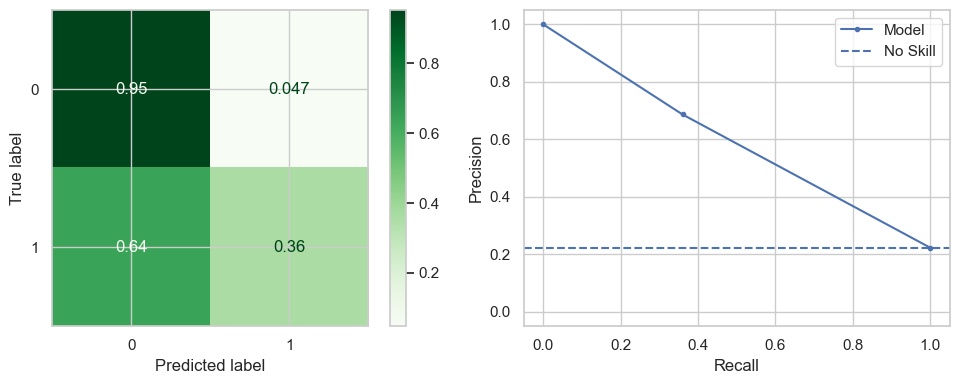

Decision Tree with PCA
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 10}
Best validation score:	0.39446158886732724
Test Scores:
- Accuracy:	0.7916497770571544
- Recall:	0.3155663234403392
- Precision:	0.5584137191854234
- F1-score:	0.40325077399380804
- AUC:		0.5133310563081521


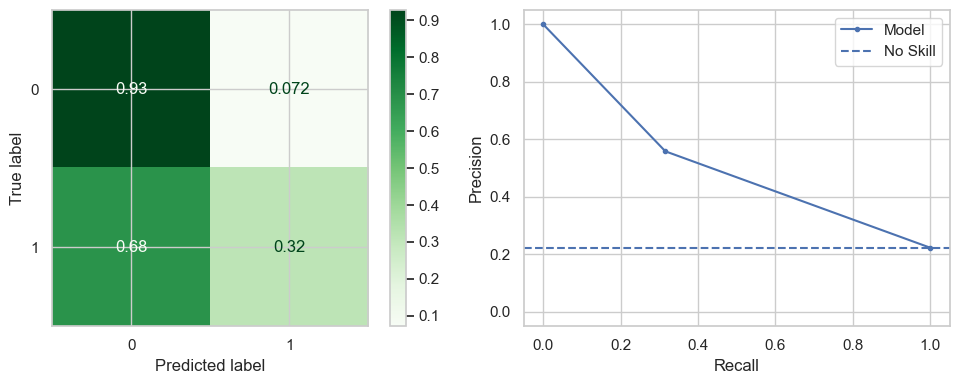

Decision Tree with PCA + SMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 50}
Best validation score:	0.7538357678019023
Test Scores:
- Accuracy:	0.6800432374003513
- Recall:	0.5057540884312538
- Precision:	0.3498114788437369
- F1-score:	0.4135710747894997
- AUC:		0.4829104690854078


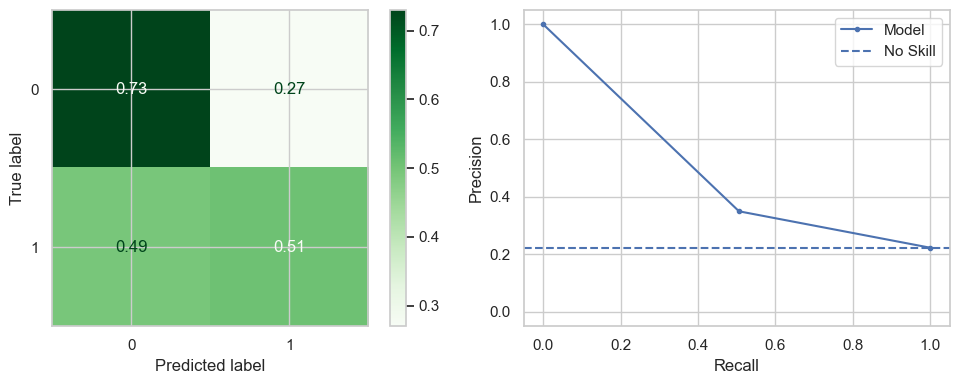

Decision Tree with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 20}
Best validation score:	0.7614507835153095
Test Scores:
- Accuracy:	0.6995000675584381
- Recall:	0.3991520290732889
- Precision:	0.3484928609201481
- F1-score:	0.37210615471485037
- AUC:		0.44084041554123954


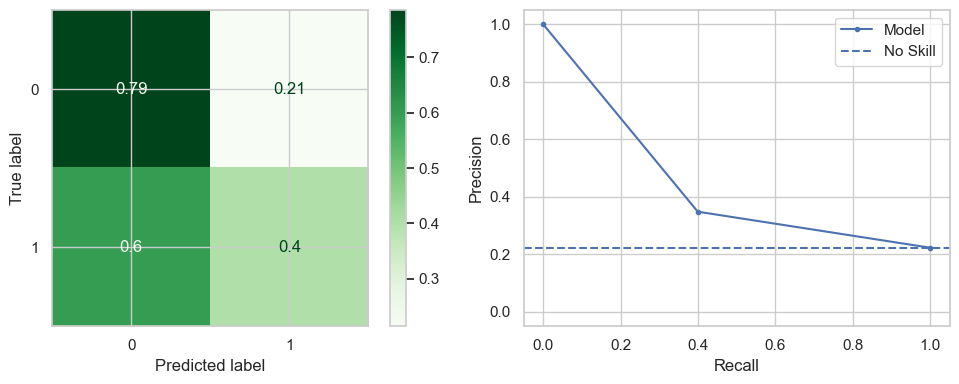

Decision Tree with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters:	{'max_depth': 5}
Best validation score:	0.7896324487225981
Test Scores:
- Accuracy:	0.5262802324010268
- Recall:	0.7843731072077529
- Precision:	0.29133858267716534
- F1-score:	0.42486876640419946
- AUC:		0.5619066488878719


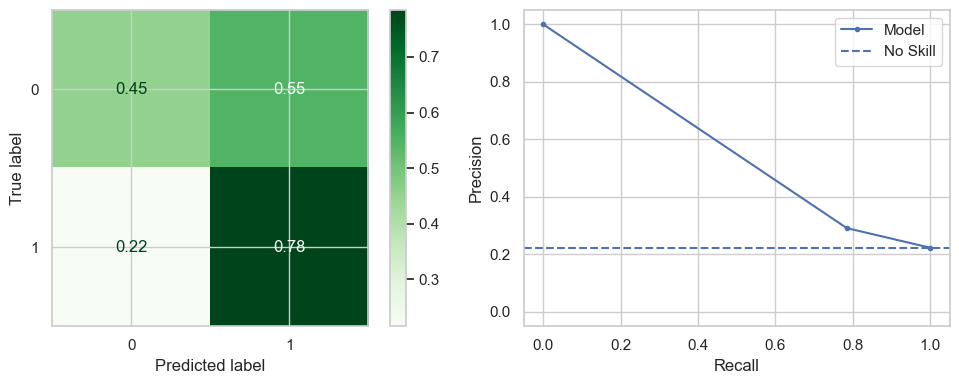

,Accuracy,Recall,Precision,F1-score,AUC
Raw data,0.820565,0.359782,0.686705,0.472178,0.594653
PCA,0.791650,0.315566,0.558414,0.403251,0.513331
PCA + SMOTE oversampling,0.680043,0.505754,0.349811,0.413571,0.482910
PCA + KMeansSMOTE oversampling,0.699500,0.399152,0.348493,0.372106,0.440840
PCA + ClusterCentroids oversampling,0.526280,0.784373,0.291339,0.424869,0.561907


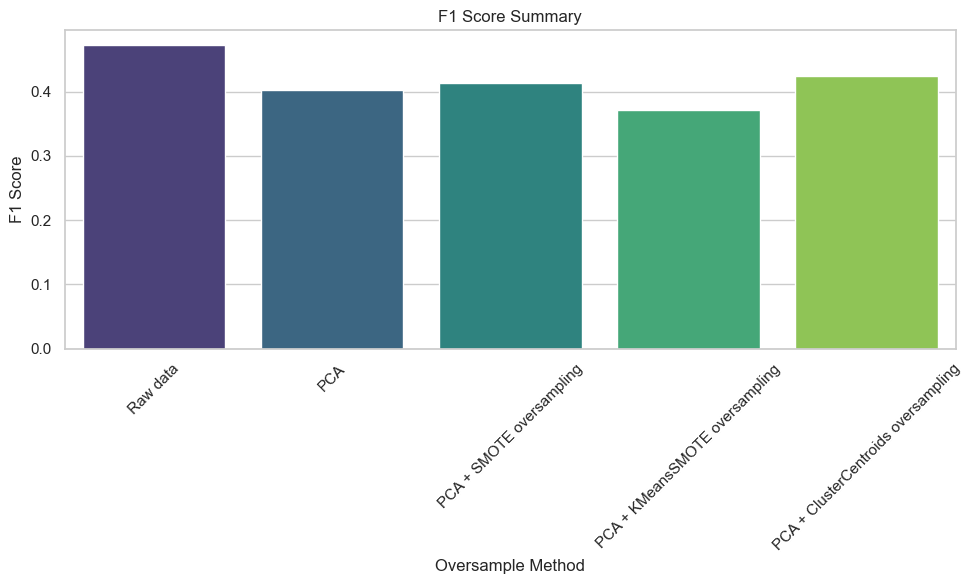

In [81]:
# Define the parameter grid for the Decision Tree
params_tree = {'max_depth': [5, 10, 20, 30, 50]}

# Run the pipeline for each oversample method and collect scores
for idx, oversample in enumerate(oversample_method):
    print(f"Decision Tree with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(
        DecisionTreeClassifier(criterion='entropy', max_features=None, random_state=24),
        params_tree,
        X_train, y_train, X_test, y_test,
        X_train_raw, X_test_raw,
        oversample
    )
    scores_tree['Accuracy'][idx] = scores[0]
    scores_tree['Recall'][idx] = scores[1]
    scores_tree['Precision'][idx] = scores[2]
    scores_tree['F1-score'][idx] = scores[3]
    scores_tree['AUC'][idx] = scores[4]

# Convert scores to DataFrame
scores_rf_tree = pd.DataFrame(data=scores_tree, index=oversample_names)

# Plot and save the summary
plot = plot_summary(scores_rf_tree["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryTree.svg")
scores_rf_tree

### RandomForest Classifier

In [82]:
# Define oversample methods and their corresponding names
oversample_method = [
    'raw',
    None, 
    SMOTE(random_state=24),
    KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
    ClusterCentroids(random_state=24)
]

oversample_names = [
    'Raw data', 
    'PCA', 
    'PCA + SMOTE oversampling', 
    'PCA + KMeansSMOTE oversampling', 
    'PCA + ClusterCentroids oversampling'
]

# Initialize scores dictionary
scores_rf = {
    'Accuracy': [0.0] * len(oversample_method),
    'Recall': [0.0] * len(oversample_method),
    'Precision': [0.0] * len(oversample_method),
    'F1-score': [0.0] * len(oversample_method),
    'AUC': [0.0] * len(oversample_method)
}


Random Forest with Raw data
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.47057067641545924
Test Scores:
- Accuracy:	0.8211052560464802
- Recall:	0.3973349485160509
- Precision:	0.665989847715736
- F1-score:	0.4977238239757208
- AUC:		0.5988830439745612


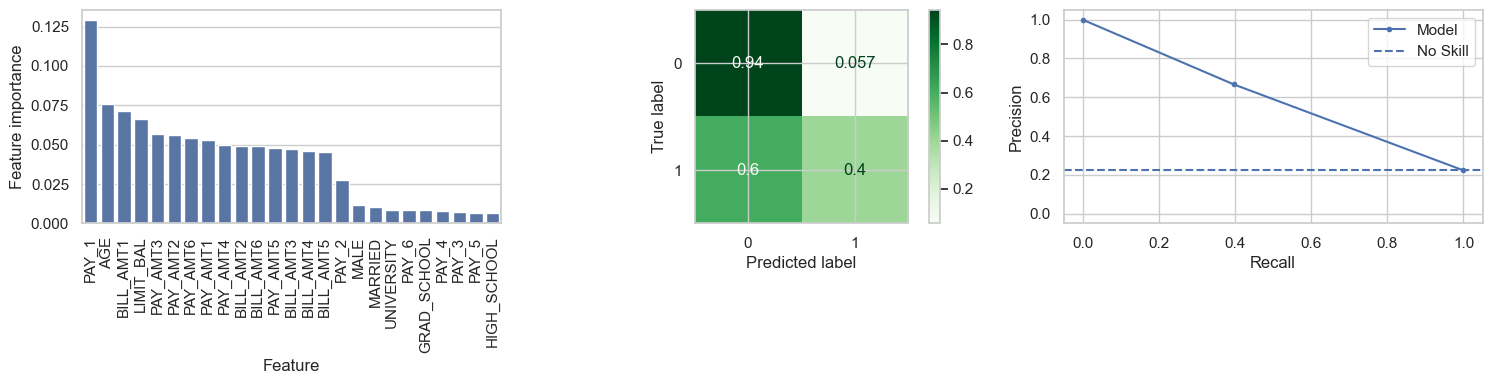

Random Forest with PCA
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 200}
Best validation score:	0.4041657038053582
Test Scores:
- Accuracy:	0.8065126334279151
- Recall:	0.3319200484554815
- Precision:	0.6248574686431014
- F1-score:	0.43354430379746833
- AUC:		0.5529057157172417


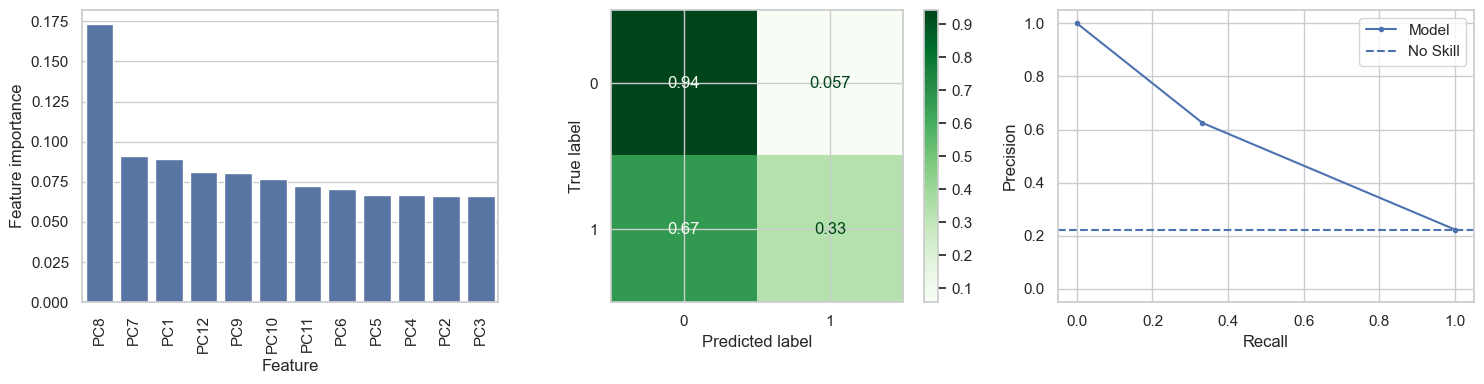

Random Forest with PCA + SMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': 'sqrt', 'n_estimators': 200}
Best validation score:	0.8559181149791751
Test Scores:
- Accuracy:	0.7763815700581003
- Recall:	0.5051483949121744
- Precision:	0.4988038277511962
- F1-score:	0.5019560637977731
- AUC:		0.5571713552176467


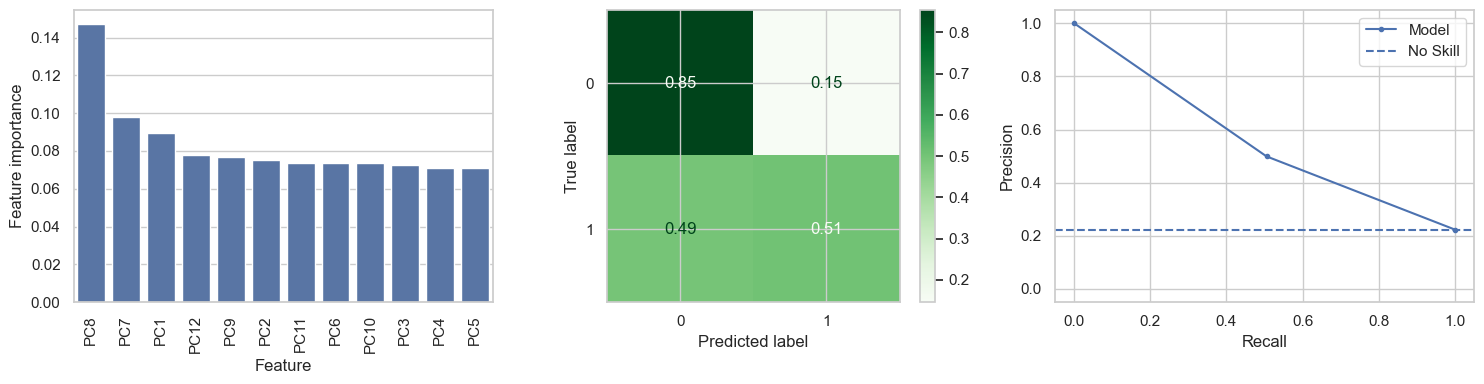

Random Forest with PCA + KMeansSMOTE oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': 'sqrt', 'n_estimators': 200}
Best validation score:	0.7910427220983791
Test Scores:
- Accuracy:	0.788136738278611
- Recall:	0.3585705632949727
- Precision:	0.5376930063578564
- F1-score:	0.43023255813953487
- AUC:		0.5196761707202127


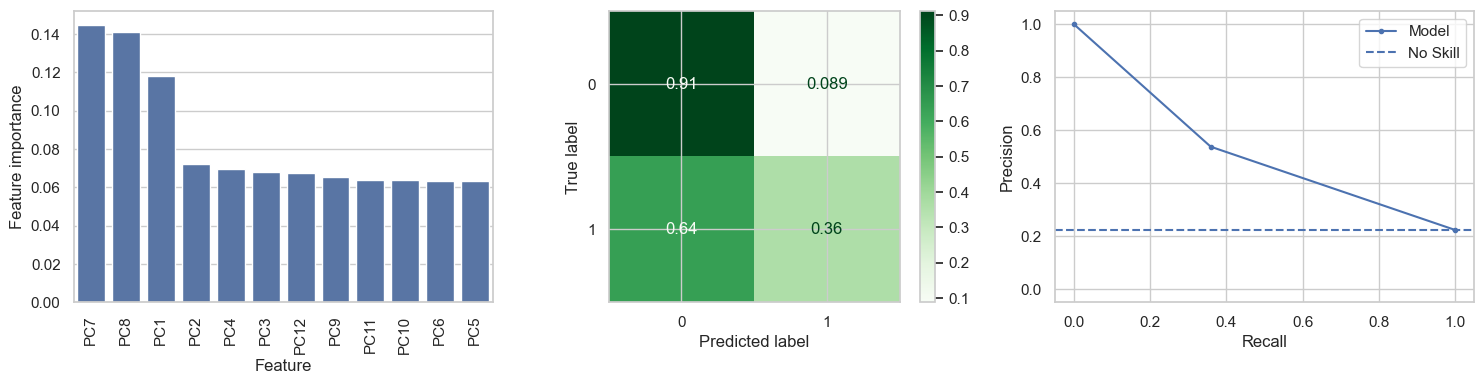

Random Forest with PCA + ClusterCentroids oversampling
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters:	{'max_features': None, 'n_estimators': 100}
Best validation score:	0.804066899661352
Test Scores:
- Accuracy:	0.5283069855424942
- Recall:	0.7952755905511811
- Precision:	0.29399910434393195
- F1-score:	0.42929540624489126
- AUC:		0.5674720995080889


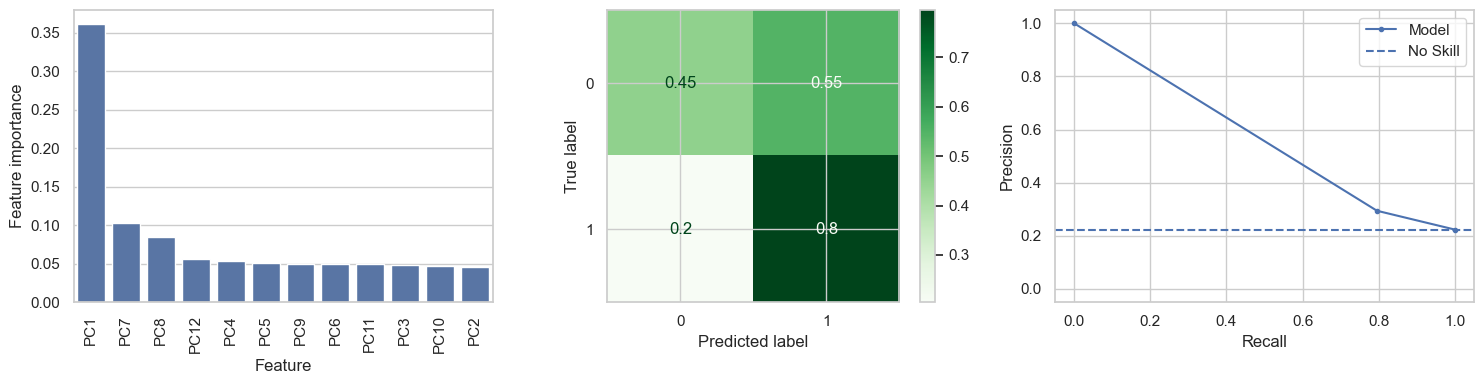

,Accuracy,Recall,Precision,F1-score,AUC
Raw data,0.821105,0.397335,0.665990,0.497724,0.598883
PCA,0.806513,0.331920,0.624857,0.433544,0.552906
PCA + SMOTE oversampling,0.776382,0.505148,0.498804,0.501956,0.557171
PCA + KMeansSMOTE oversampling,0.788137,0.358571,0.537693,0.430233,0.519676
PCA + ClusterCentroids oversampling,0.528307,0.795276,0.293999,0.429295,0.567472


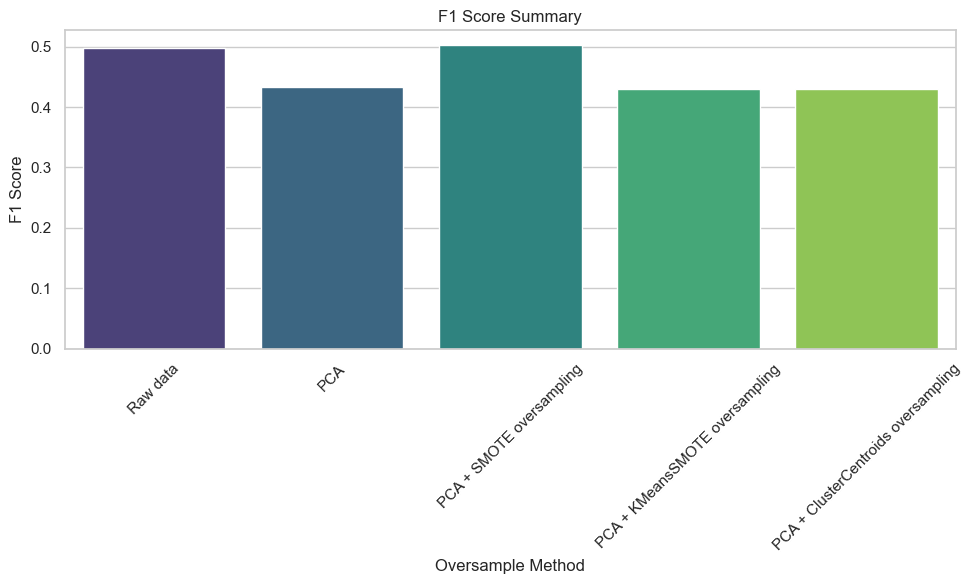

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for the Random Forest
params_rf = {'n_estimators': [10, 50, 100, 200], 
             'max_features': [None, 'sqrt']}

# Run the pipeline for each oversample method and collect scores
for idx, oversample in enumerate(oversample_method):
    print(f"Random Forest with {oversample_names[idx]}")
    scores, y_pred_max, y_test_max = tree_pipeline(
        RandomForestClassifier(criterion='entropy', random_state=24, n_jobs=-1),
        params_rf,
        X_train, y_train, X_test, y_test,
        X_train_raw, X_test_raw,
        oversample,
        plot=True
    )
    scores_rf['Accuracy'][idx] = scores[0]
    scores_rf['Recall'][idx] = scores[1]
    scores_rf['Precision'][idx] = scores[2]
    scores_rf['F1-score'][idx] = scores[3]
    scores_rf['AUC'][idx] = scores[4]

# Convert scores to DataFrame
scores_rf_df = pd.DataFrame(data=scores_rf, index=oversample_names)

# Plot and save the summary
plot = plot_summary(scores_rf_df["F1-score"], oversample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryRF.svg")
scores_rf_df

## Model Comparisions

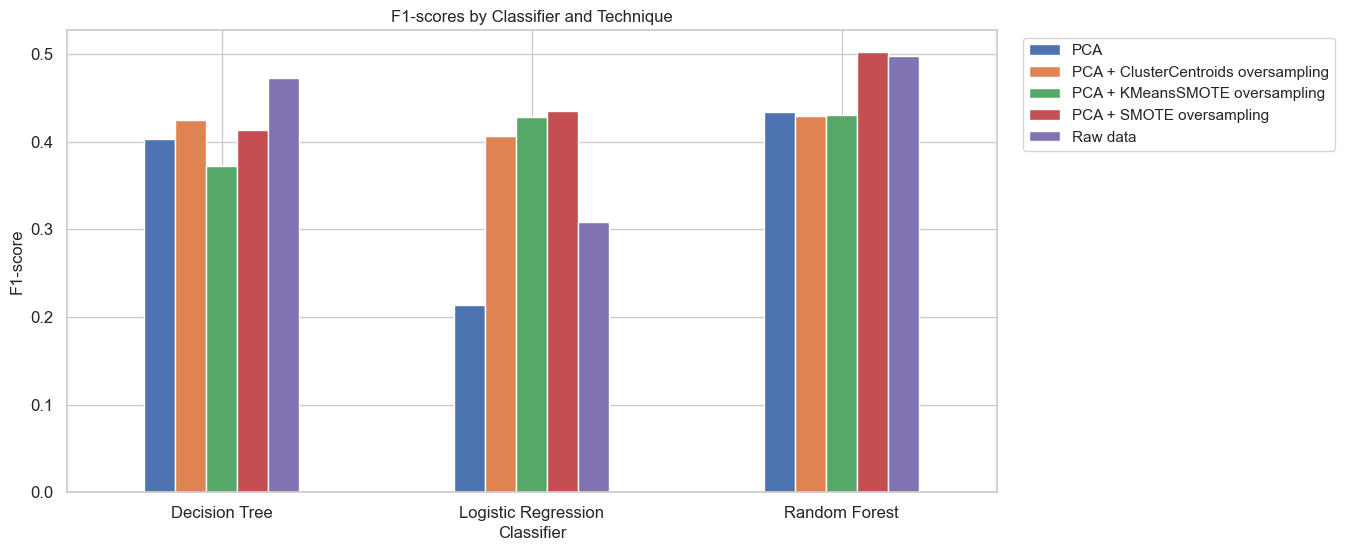

In [90]:
# classifiers = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
# dataframes = [scores_lr_df, scores_svm_df, scores_rf_tree, scores_rf_df]

classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
dataframes = [scores_lr_df, scores_rf_tree, scores_rf_df]

for clf, df in zip(classifiers, dataframes):
    df['Classifier'] = clf
    df['Technique'] = df.index

# Combine all DataFrames into one
scores_combined = pd.concat(dataframes, ignore_index=True)

# Plot the F1-scores
ax = scores_combined.set_index(['Technique', 'Classifier']).unstack(0)['F1-score'].plot(kind='bar', 
                                                                                        ylabel='F1-score', 
                                                                                        figsize=(12, 6), 
                                                                                        fontsize=12, 
                                                                                        rot=0)
ax.legend(bbox_to_anchor=(1.02, 1))
plt.title('F1-scores by Classifier and Technique')
plt.show()